## Знакомство с данными

### Описание проекта

  Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

<ul type="disc"><li>Name — название игры</li>
<li>Platform — платформа</li>
<li>Year_of_Release — год выпуска</li>
<li>Genre — жанр игры</li><li>NA_sales — продажи в Северной Америке (миллионы проданных копий)</li>
<li>EU_sales — продажи в Европе (миллионы проданных копий)</li>
<li>JP_sales — продажи в Японии (миллионы проданных копий)</li><li>Other_sales — продажи в других странах (миллионы проданных копий</li><li>Critic_Score — оценка критиков (максимум 100)</li>
<li>User_Score — оценка пользователей (максимум 10)</li>
<li>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</li>

### Импорт библиотек

In [ ]:
#импортировали необходимые библиотеки
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
%matplotlib inline
plt.rcParams['figure.facecolor'] ='black'
import seaborn as sns
sns.set(style="darkgrid")
import numpy as np
#для поиска всех совпадений регулярного выражения в строке.
import re
from scipy import stats as st
from IPython.display import display
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#изменим настройки для лучшего отображения данных:
#данные  float будут по умолчанию с 2-мя знаками после запятой. Увеличили количество отображаемых столбцов датафрейма.
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100

### Загрузка данных

In [ ]:
# при первом знакомстве с данными было принято решение сразу воспользоваться параметром na_values для замены пропусков на 'NaN'.
# так же были изменены названия столбцов.
try:
    data=pd.read_csv('/datasets/games.csv',
na_values='NaN',
names=['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating'],skiprows=1)
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv',
na_values='NaN',
names=['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating'],skiprows=1)

In [ ]:
# создадим копию датафрейма, чтобы иметь возможность сравнить с "сырыми" данными при необходимости.
data_true=data.copy(deep=True)
print(data.info())
data. head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
#посмотрим с какими данными мы имеем дело.
#Укажем percentile для большего охвата данных и включим в describe не только числовые данные,но и объекты.
data.describe(include = "all",percentiles=[.10,.25,.50,.75,.95])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,16713,16715,"16,446.00",16713,"16,715.00","16,715.00","16,715.00","16,715.00","8,137.00",10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,"2,006.48",NaN,0.26,0.15,0.08,0.05,68.97,NaN,NaN
std,NaN,NaN,5.88,NaN,0.81,0.50,0.31,0.19,13.94,NaN,NaN
min,NaN,NaN,"1,980.00",NaN,0.00,0.00,0.00,0.00,13.00,NaN,NaN
10%,NaN,NaN,"1,999.00",NaN,0.00,0.00,0.00,0.00,50.00,NaN,NaN
25%,NaN,NaN,"2,003.00",NaN,0.00,0.00,0.00,0.00,60.00,NaN,NaN
50%,NaN,NaN,"2,007.00",NaN,0.08,0.02,0.00,0.01,71.00,NaN,NaN


### Вывод

В данном разделе мы провели знакомство с описанием проекта, а так же увидели, какая информация хранится в столбцах датафрейма. Были загружены необходимые библиотеки и загружен сам файл с данными. Т. к. в разделе 'описание данных' были приведены названия столбцов с расшифровкой данных, то было принято решение привести их к правильному формату на этапе чтения файла. Была создана копия датафрейма, чтобы иметь возможность сравнить при желании с 'сырыми' данными. В наших данных в 6 столбцах из 11 есть отсутствующие значения. По типу данных датафрейма сразу видно, что уже можно сделать,для улучшения качества датафрейма,например: 'rating' можно привести к типу-'category', 'year_of_release' к 'int'. Все эти действия и не только будут проведены уже в следующем разделе. В этом же мы только их наметили.

## Часть 1. Подготовка данных:

### Работа с пропусками и дубликатами.Изменение типа данных.

In [ ]:
# рассмотрев ранее данные начнём с разбора текстовых и категорийных данных.
# И первым шагом приведём их к единому формату, а именно применем метод 'lower'.
data.name=data.name.str.lower()
data.genre=data.genre.str.lower()
data. platform=data.platform.str.lower()
# посмотрим, что у нас с отсутствующими данными.
data.isnull(). sum().sort_values ()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

Как видно из таблицы выше больше всех 'страдают' от отсутствия данных серии с рейтингом/очками: 'user_score', 'rating' и 'critic_score'.Также есть пара отсутствующих данных в 'name' и 'genre'. Начнём анализ причин отсутствия данных в порядке возврастания количества пропусков.

In [ ]:
# Отфильтруем данные с NaN в 'name'.
display (data. query ('name! =name'))
# Из результата фильтра данных мы видим, что в 2х строках нет ни только имён, но названий  жанра и даже оценок игр.
# Эти данные мы не сможем восстановить или чем-то заполнить

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
# Удаляем строки 659 и 14244. Заодно пропадают и 2 пропуска в 'genre'.
data=data. query ('name==name')
data.isna(). sum().sort_values ()

name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
year_of_release     269
user_score         6699
rating             6764
critic_score       8576
dtype: int64

Итак у нас на очереди разбор вариантов заполнения данных по году релиза игр в 'year_of_release'.

In [ ]:
# создадим функцию для возврата значения года из названия игры.
def find_year (text:str):
  """ Функция возвращает из строки только строку содержащую информацию о годе """
  res = re.findall("(?<!\d)\d{4}(?!\d)", text)
  fin=''.join(res)
  return fin

# создадим колонку 'year', куда будут записаны значения года из названия игр,
# если они указаны при помощи функции 'find_year' к колонке 'name'.
data['year']=data['name'].apply(find_year)
# посмотрим, сколько значений года мы сможем таким образом заполнить.
display (data. query('year!="" and year_of_release!=year_of_release').head())
print("Заполним годом из названия игры:",data. query('year!="" and year_of_release!=year_of_release'). shape[0], " строк колонки year_of_release из 269 строк с пропусками.")
data. loc[(data.year_of_release.isnull())&(data.year!=""), 'year_of_release']=data.loc[data.year_of_release.isnull(), 'year']
print ('Остались незаполненными 252 строки из 269.')
data. query('year_of_release!=year_of_release'). head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.00,8.5,E,2004
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.00,6.4,E,2004
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006
1650,nascar thunder 2003,ps2,NaN,racing,0.60,0.46,0.00,0.16,84.00,8.7,E,2003
2572,pes 2009: pro evolution soccer,psp,NaN,sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2009


Заполним годом из названия игры: 17  строк колонки year_of_release из 269 строк с пропусками.
Остались незаполненными 252 строки из 269.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.00,7.9,E10+,
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,
627,rock band,x360,NaN,misc,1.93,0.33,0.00,0.21,92.00,8.2,T,
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.00,tbd,E,
678,lego indiana jones: the original adventures,wii,NaN,action,1.51,0.61,0.00,0.21,78.00,6.6,E10+,


In [ ]:
#удалим оставшиеся 252 строки с пропусками в 'year_of_release'.
data.dropna(subset=['year_of_release'],how='all',inplace=True)
data. drop(['year'], axis=1, inplace=True)

Было принято решение удалить оставшиеся строки с пропусками по годам выхода релизов игр после заполнения их годом из названия игр, если он там был указан,т.к. это составляет менее 1,5% от общих данных. Так же рассматривался вариант с заполнением средним значением по годам по играм с таким же названием,но в результате были получены значения года с плавающей точкой,а значит можно прийти к выводу,что на разных платформах одна и так же игра может выйти с разницей в несколько лет. Значит действуем по принципу Бритвы Оккама «Не следует множить сущее без необходимости» и удаляем эти данные.

In [ ]:
# посмотрим ещё раз на данные.
data. head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,"2,006.00",sports,41.36,28.96,3.77,8.45,76.00,8,E
1,super mario bros.,nes,"1,985.00",platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,"2,008.00",racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,wii sports resort,wii,"2,009.00",sports,15.61,10.93,3.28,2.95,80.00,8,E
4,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# приведем столбец с годом к типу 'int32'.
data.year_of_release=data.year_of_release.astype('int32')
# посмотрим, что из пропусков в итоге осталось.
data.isnull(). sum().sort_values ()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
user_score         6610
rating             6682
critic_score       8466
dtype: int64

In [ ]:
#проанализируем количество явных дубликатов.
data.duplicated().sum()

0

In [ ]:
# проверим, отсортировав, уникальные значения в 'year_of_release'.
data_y=data. year_of_release.unique()
np. sort (data_y)

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016], dtype=int32)

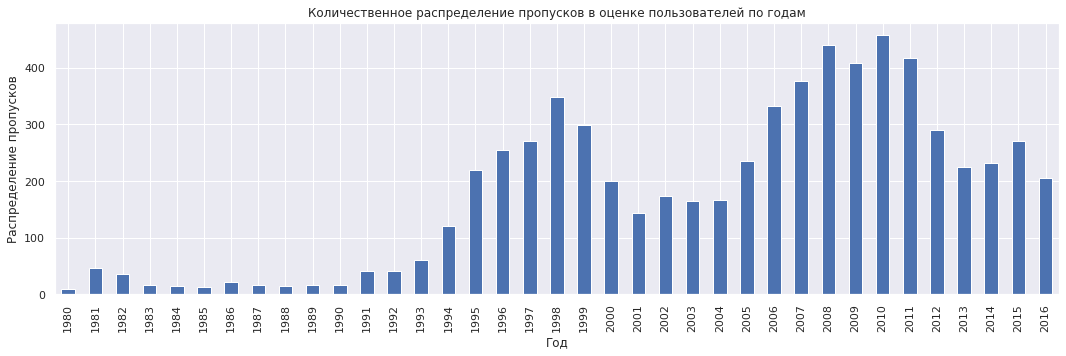

In [ ]:
# построим график распределения пропусков в оценке пользователей.
user_null=data[data['user_score'].isnull()]['year_of_release'].value_counts().sort_index(ascending=True)
sns. set()
(user_null
 .plot(kind='bar' ,figsize=(18,5),xlabel='Год', ylabel='Распределение пропусков')
 .set(title='Количественное распределение пропусков в оценке пользователей по годам')
);

Как видим на графике выше количество пропусков по пользовательским оценкам довольно высокое и встречается каждый год на протяжении с 1980 по 2016 год.Это может быть связано с отсутствием возможности отставить оценку,либо же с новизной игр. В любом случае заполнить какими-любо реальными оценками мы не можем. Сделаем "заглушку" заполнив пропуски '-1'.

In [ ]:
#очистка данных 'user_score' от nan
data['user_score'].fillna('-1', inplace=True)

Столбец rating содержит данные рейтинга ESRB. Рейтинги ESRB дейтвительны в США и Канаде, и большинство игровых издателей с уважением относятся к этой организации. Помимо ESRB, существуют и другие рейтинговые системы оценки игр: PEGI в Европе, CERO в Японии, а так же в Австралии (отличается своей непродуманностью и недружелюбием). Значит данный рейтинг только для США и Канады, а в нашей таблице данных больше и с другой локацией, поэтому пропуски - это нормально, заменим их на TBD.

Столбец critic_store содержит оценку критиков в стабальной шкале оценок, если пропуск то заменить лучше на 0, что будет означать, что критики нет для данной игры.

[Text(0.5, 1.0, 'Количественное распределение рейтинга')]

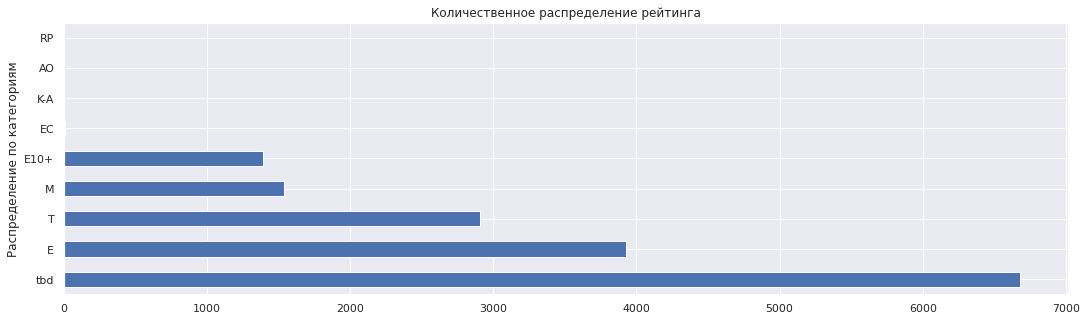

In [ ]:
# Заполним пропуски и посмотрим на распределение рейтинга по количеству.
data['rating'].fillna('tbd', inplace=True)
data['critic_score'].fillna(0, inplace=True)
(data['rating'].value_counts().plot(kind='barh',figsize=(18,5),xlabel='Распределение по категориям', ylabel='Рейтинг').set(title='Количественное распределение рейтинга'))

In [ ]:
# проверим оставшиеся пропуски.
data. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  int32  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     16461 non-null  float64
 9   user_score       16461 non-null  object 
 10  rating           16461 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


**Вывод**

В данном разделе колонки 'name', 'genre', 'platform' были проведены к единому стилю при помощи метода строк ' lower(), т. к. содержат только названия. Удалены 2 строки с пропусками по колонкам 'name' и 'genre'. В колонке 'year_of_release' заполнено при помощи функции 'find_year' пропуски годом из названия.Оставшиеся строки после заполнения удалены. Колонки 'user_score' на -1 и 'critic_score' были заполнены 0,т.к. оценки довольно таки субъективные и заполнить средней или медианой было бы неправильно на данном этапе. В колонке 'rating' использована заглушка 'tbd',т.к. в данной колонке категорийные данные. Заполнить чем-то другим не можем, т. к. не все страны и не все игры имеют рейтинг ESRB. Явные дубликаты не были обнаружены. Итого удалено менее 1,5% данных.

### Подготовка данных: поиск артефактов.

In [ ]:
# посмотрим уникальные значения в столцах 'critic_score', 'user_score', 'rating'.
score_info=['critic_score', 'user_score', 'rating']
for i in score_info:
  print(data[i].unique(),sep='\n')

[76.  0. 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
['8' '-1' '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
['E' 'tbd' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


В 'critic_score' оставим всё как есть,в том числе тип данных.В 'user_score' и 'rating' же есть артефакты, которые нужно исправить, а именно: 'tbd' и 'K-A'. Остальные данные соответствуют своему диапазону,согласно описанию данных,а именно 'critic_score' от 13 до 100 включительно, 'user_score' от 0 до 10 (не считая заглушки -1 и 0). Начнём с серии 'user_score'.

Итак,что же такое tbd? TBD расшифровывается, как To Be Decided или To Be Determined TBD. Это аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Данный акроним служит для отметки неясностей или пропусков, которые надо заполнить. В нашем случае заполним эти значения -1,как и все имеющиеся пропуски в данной серии,т.к. данным возможно ещё не дали оценку пользователи.

In [ ]:
# Заменим 'tbd' на '-1' и изменим тип данных на 'float'.
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1
data.user_score=data.user_score.astype('float')

In [ ]:
# Вернëмся к значениям в столбце 'rating'.
data. rating. unique ()

array(['E', 'tbd', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Продолжим работу с данными в 'rating'.

Согласно справочной информации из первой ссылки ниже, 'K-A' - отсутствует в наименованиях рейтинговой системы Entertainment Software Rating Board на сегодняшний день. Согласно же 2-ой ссылки  - название рейтинга 'K-A' использовалось в игровой индустрии до 1998 года, а потом было заменено на 'Е'.

<a href="https://www.kingston.com/ru/blog/gaming/understanding-video-games-age-ratings-esrb-pegi"> Источник со всеми актуальными рейтингами для видео игр ESRB.

<a href="https://videogamegeek.com/videogamerating/2220/esrb-k"> Конкретная статья по 'К-А' рейтингу.

In [ ]:
# заменим в 'rating' 'K-A' на 'Е' и изменим тип данных на 'category'.
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data. rating=data.rating.astype('category')
data. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16461 non-null  object  
 1   platform         16461 non-null  object  
 2   year_of_release  16461 non-null  int32   
 3   genre            16461 non-null  object  
 4   na_sales         16461 non-null  float64 
 5   eu_sales         16461 non-null  float64 
 6   jp_sales         16461 non-null  float64 
 7   other_sales      16461 non-null  float64 
 8   critic_score     16461 non-null  float64 
 9   user_score       16461 non-null  float64 
 10  rating           16461 non-null  category
dtypes: category(1), float64(6), int32(1), object(3)
memory usage: 1.3+ MB


**Вывод**

Мы рассмотрели рейтинговые данные из 3х колонок датафрейма:critic_score,user_score, rating. Данные в колонке 'user_score' приведены к типу данных 'float', 'rating' к типу 'category'. Так же  в данном разделе мы избавились от артефактов в виде 'tbd' в серии 'user_score' заменив на -1 -видимо, данные забыли заполнить, ещё мы заменили категорию 'К-А' на 'Е' в серии 'rating'. Данный рейтинг - 'К-А' является устаревшим и уже не участвует в оценке допустимой возрастной группы пользователей игр.

### Добавление данных с суммарными продажами по регионам.

In [ ]:
#посчитаем суммарные продажи во всех регионах
data['total_game_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1).round(2)
data. sample (5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_game_sales
5591,madden nfl 09,ds,2008,sports,0.30,0.00,0.00,0.02,0.00,7.80,E,0.32
15067,warhammer online: age of reckoning,pc,2008,role-playing,0.00,0.02,0.00,0.00,86.00,7.90,T,0.02
6787,skylanders: superchargers,xone,2015,action,0.17,0.05,0.00,0.02,76.00,5.50,E10+,0.24
1692,spongebob squarepants: revenge of the flying dutchman,gba,2002,platform,0.92,0.23,0.00,0.04,71.00,7.70,E,1.19
10858,speed kings,ps2,2003,racing,0.05,0.04,0.00,0.01,61.00,7.80,E,0.10


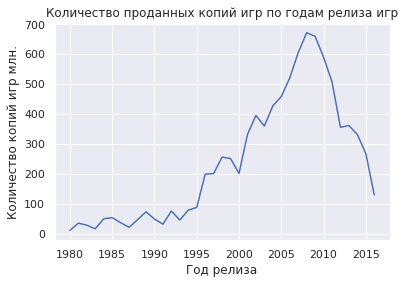

In [ ]:
# построим график для первичного знакомства с новым столбцом датафрейма.
plt. plot(data.groupby('year_of_release')['total_game_sales'].sum())
plt.title('Количество проданных копий игр по годам релиза игр')
plt.xlabel('Год релиза')
plt.ylabel('Количество копий игр млн.')
plt.show()

Как видно из графика выше -самый пик по количеству проданных копий пришёлся на 2008-2009 год.

**Вывод**


В этом разделе добавлена колонка 'total_game_sales' с данными, содержащими суммарные продажами по регионам. Построен график для первичной оценки количества проданных копий игр по годам.

### Вывод

        В данном разделе исследовательской работы были проведены следующие действия:

* приведены к единому формату с прописными буквами 'name', 'genre', 'platform'.
* удалены 254 строки с пропусками по 'name' (2) и 'year_of_release' (252 строки оставшиеся после заполнения годом из названия игры). Это 1,5% от датафрейма. Заполнить данные пропуски не получилось. Например, год выпуска у разных платформ,но по одной и той же игре, может различаться на несколько лет, а название игры в 'name' мы не можем даже предположить. Скорее всего пропуски обусловлены человеческим фактором.
  С пропусками в 'critic_score' - заменили на 0,с 'user_score' решено пока заполнить на -1. Возможно на этапе заполнения данных эти рейтинги были ещё не присвоены играм. Если посмотреть на примере известного магазина видеоигр 'https://store.epicgames.com' можно увидеть,что далеко не все игры имеют рейтинг, а также бывают прецеденты, когда при выходе игры, её целенаправленно 'топят' пользователи или же обходят стороной известные в игровой индустрии критики,тем самым искусственно занижая рейтинг. Магазин видеоигр может пойти на встречу платформе и убрать даже возможность оставить отзыв.

    В части возрастного 'rating' заполнен ' tbd',  т. к. в колонке категорийные названия данные и рейтинг ESRB используется только в Америке и в Канаде, в остальных странах используются свои рейтинги отличные от других.
* скорректирован тип данных столбцов: 'year_of_release' - 'int',  год всегда целое число; 'user_score' - 'float', ранее был распознан при чтении файла данных, как 'object', хотя в серии представлены только числа с плавающей точкой; 'rating' в тип 'category', т. к. содержит в себе только категорийные данные. Остальные типы данных в колонках соответствуют действительности.
* проведен поиск и замена артефактов: значение 'tbd' в 'critic_score' заменён на 0,данные скорее всего забыли заполнить; значение 'К-А' в 'rating'заменено на более актуальную категорию 'Е'.
* была добавлена колонка с общим количеством копий по все регионам - 'total_game_sales'.Согласно графика самый пик по продажам игр пришёлся на 2008-2009 год.

  Теперь перейдем к более серьёзному анализу данных

In [ ]:

# Посмотрим, что у нас осталось
temp = data.copy()
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              16461 non-null  object  
 1   platform          16461 non-null  object  
 2   year_of_release   16461 non-null  int32   
 3   genre             16461 non-null  object  
 4   na_sales          16461 non-null  float64 
 5   eu_sales          16461 non-null  float64 
 6   jp_sales          16461 non-null  float64 
 7   other_sales       16461 non-null  float64 
 8   critic_score      16461 non-null  float64 
 9   user_score        16461 non-null  float64 
 10  rating            16461 non-null  category
 11  total_game_sales  16461 non-null  float64 
dtypes: category(1), float64(7), int32(1), object(3)
memory usage: 1.5+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game

## Часть 2. Проведение исследовательского анализа данных:

### Жизненный цикл игровых платформ. Выбор периода для прогноза на 2017 год.

Построим график для визуализации общих тенденций по количеству релизов.

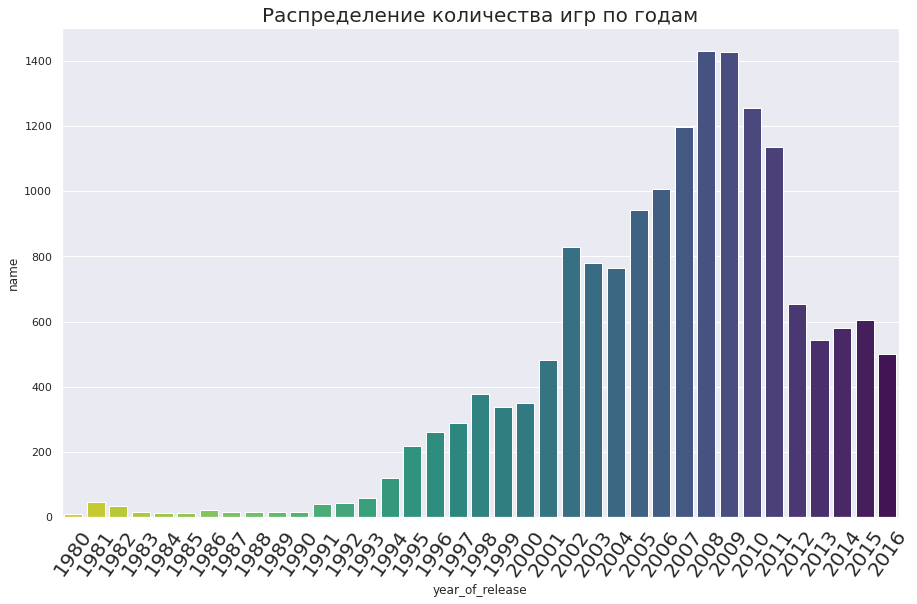

In [ ]:
games_for_year=data. groupby('year_of_release',as_index=False) ['name'].count()
plt.figure(figsize=(15,9))
g = sns.barplot(data=games_for_year, x='year_of_release', y='name', ci=False, palette='viridis_r')
g.set_xticklabels(games_for_year['year_of_release'], rotation=55, fontdict={'fontsize':20})
g.set_title('Распределение количества игр по годам',fontdict={'fontsize':20})
plt.show()

In [ ]:
# Посмотрим, как менялись продажи по платформам с разбиением по годам начиная с 2010 года.
games_for_year_and_sale=data.query('year_of_release>=2010').pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')
games_for_year_and_sale

platform,3ds,ds,pc,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,,
2010,NaN,323.00,90.00,38.00,181.00,NaN,188.00,NaN,253.00,NaN,182.00,NaN
2011,116.00,153.00,139.00,7.00,215.00,NaN,139.00,18.00,143.00,NaN,207.00,NaN
2012,93.00,23.00,61.00,NaN,148.00,NaN,106.00,53.00,31.00,32.00,106.00,NaN
2013,91.00,8.00,39.00,NaN,126.00,16.00,54.00,63.00,12.00,42.00,75.00,19.00
2014,80.00,NaN,47.00,NaN,108.00,75.00,10.00,100.00,6.00,31.00,63.00,61.00
2015,86.00,NaN,50.00,NaN,73.00,137.00,3.00,110.00,4.00,28.00,35.00,80.00
2016,46.00,NaN,54.00,NaN,38.00,164.00,NaN,85.00,1.00,14.00,13.00,87.00


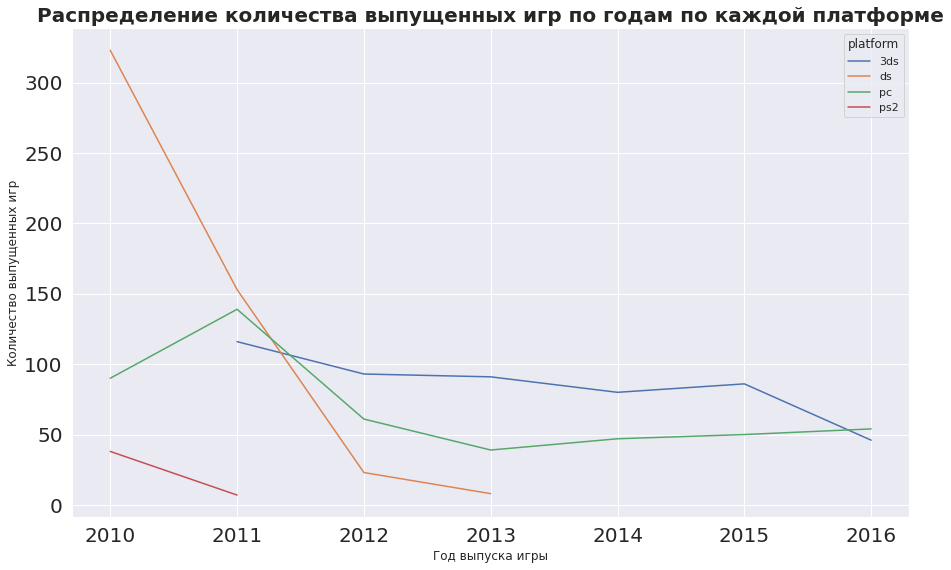

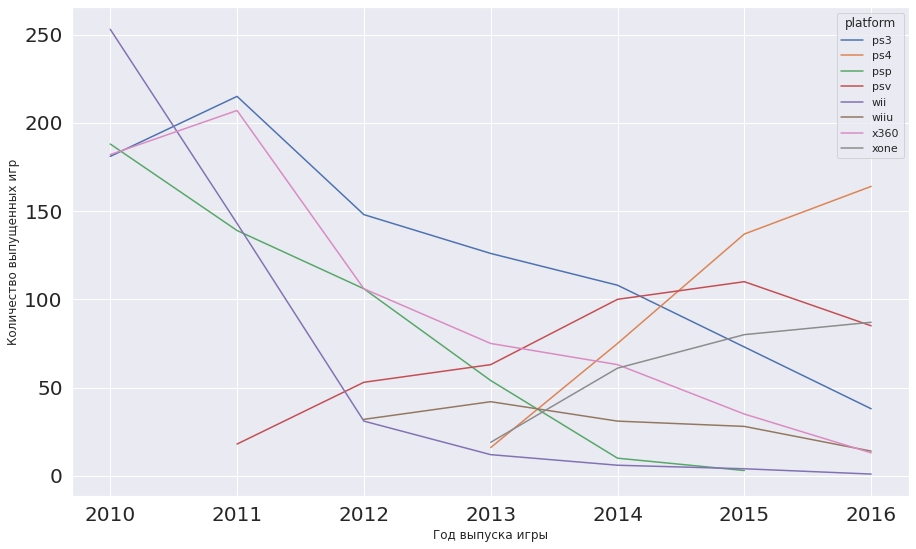

In [ ]:
# построим графики по распределению вышедших игр по годам и платформам.
games_for_year_and_sale.loc[:,'3ds':'ps2'].plot(grid=True, figsize=(15, 9),fontsize=20,xlabel='Год выпуска игры', ylabel='Количество выпущенных игр')
plt.title('Распределение количества выпущенных игр по годам по каждой платформе', fontsize=20,fontweight='bold')
games_for_year_and_sale.loc[:,'ps3':'xone'].plot(grid=True, figsize=(15, 9),fontsize=20,xlabel='Год выпуска игры', ylabel='Количество выпущенных игр')
plt. show()

Как видно из графиков выше можно выделить 3 группы платформ с учётом года и количества продаж:

1.'Развивающиеся':
* ps4
* xone
* 3ds
2.'Затухающие':
* x360
* wii
* psp
3.'Остальные':
* psv
* pc
* ps3
* wi

Для дальнейшего анализа построим график распределения по годам. Будет оптимально рассматривать 2012 и 2016 года, т. к. игровая индустрия развивается динамично и рассмотрение большего периода исказит прогноз из-за включения отживших трендов.

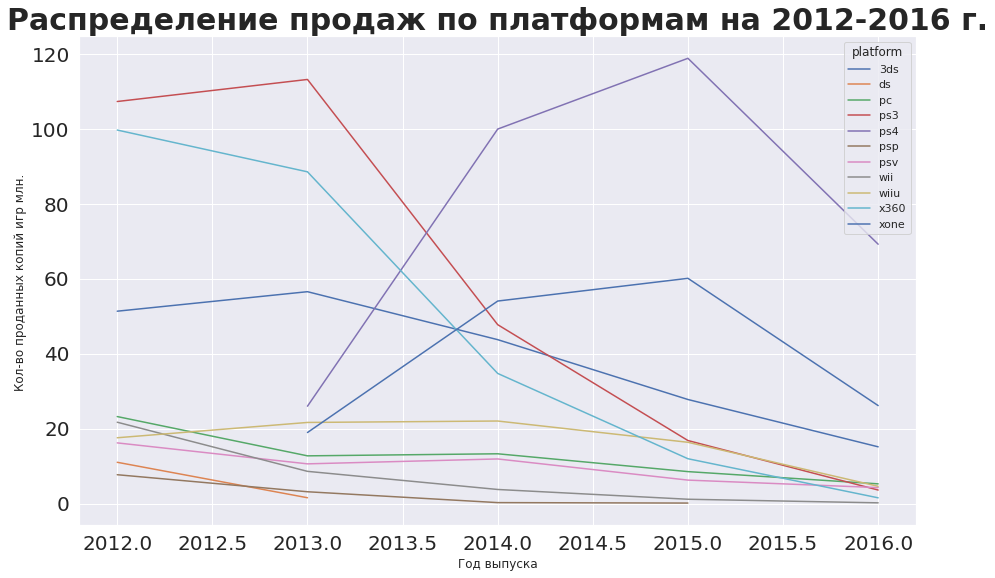

In [ ]:
# сделаем отбор по 2012-2016 году и построим график
# по сумме продаж разных платформ с разбивкой по годам.
data_since2012=data.query('year_of_release>=2012')
data_since2012.pivot_table(index='year_of_release', columns = 'platform', values='total_game_sales', aggfunc='sum').plot(kind='line',grid=True, figsize=(15, 9),fontsize=20,xlabel='Год выпуска', ylabel='Кол-во проданных копий игр млн. ')
plt. title ('Распределение продаж по платформам на 2012-2016 г.', fontsize=30,fontweight='bold')
plt.show()

На графике выше подтверждается, что продажи имеют тенденцию к снижению. Только в группе 'развивающихся',к которым относятся ps4 и xone, показатели положительные. По остальным, кроме PC, платформам показатель близится к 0. PC показывает низкие, но стабильные продажи

Посмотрим на распределение показателей по рынкам за 2012-2016 года.

In [ ]:
data_5years=data.query('year_of_release in [2012,2013,2014,2015,2016]').pivot_table(index=['platform'],columns='year_of_release',values=['na_sales','eu_sales','jp_sales', 'other_sales'], aggfunc='sum',fill_value='nothing',margins=True)
data_5years.columns=['2012_eu','2013_eu','2014_eu','2015_eu', '2016_eu', 'total_eu','2012_jp','2013_jp','2014_jp','2015_jp', '2016_jp', 'total_jp','2012_na','2013_na','2014_na', '2015_na', '2016_na', 'total_na','2012_otr','2013_otr','2014_otr', '2015_otr', '2016_otr', 'total_otr']
data_5years=data_5years.sort_values ('total_na')
data_5years

,2012_eu,2013_eu,2014_eu,2015_eu,2016_eu,total_eu,2012_jp,2013_jp,2014_jp,2015_jp,2016_jp,total_jp,2012_na,2013_na,2014_na,2015_na,2016_na,total_na,2012_otr,2013_otr,2014_otr,2015_otr,2016_otr,total_otr
platform,,,,,,,,,,,,,,,,,,,,,,,,
psp,0.25,0.17,0.00,0.00,nothing,0.42,7.18,2.93,0.24,0.12,nothing,10.47,0.13,0.00,0.00,0.00,nothing,0.13,0.13,0.04,0.00,0.00,nothing,0.17
ds,2.68,0.85,nothing,nothing,nothing,3.53,3.72,0.00,nothing,nothing,nothing,3.72,4.02,0.57,nothing,nothing,nothing,4.59,0.59,0.12,nothing,nothing,nothing,0.71
psv,5.26,2.57,2.45,0.69,0.39,11.36,2.45,4.05,6.13,4.85,3.56,21.04,5.94,2.52,1.98,0.39,0.15,10.98,2.54,1.45,1.34,0.32,0.15,5.80
wii,5.99,3.34,1.86,0.62,0.11,11.92,3.34,0.05,0.00,0.00,0.00,3.39,10.89,4.48,1.59,0.43,0.06,17.45,1.49,0.72,0.30,0.09,0.01,2.61
pc,12.40,7.64,8.87,5.57,3.53,38.01,0.00,0.00,0.00,0.00,0.00,0.00,8.01,3.94,3.51,2.36,1.36,19.18,2.81,1.15,0.90,0.59,0.36,5.81
wiiu,5.28,6.70,6.66,5.01,1.48,25.13,2.13,3.57,3.19,3.45,0.67,13.01,8.89,9.85,10.50,6.76,2.10,38.10,1.26,1.53,1.68,1.13,0.35,5.95
3ds,11.68,14.84,8.73,5.06,2.33,42.64,19.98,23.57,20.69,15.52,8.03,87.79,17.11,15.56,12.33,6.17,4.14,55.31,2.59,2.60,2.01,1.03,0.64,8.87
xone,nothing,5.34,18.15,18.47,9.63,51.59,nothing,0.02,0.14,0.17,0.01,0.34,nothing,11.85,30.97,36.03,14.27,93.12,nothing,1.75,4.81,5.47,2.24,14.27
ps3,39.05,42.27,18.24,6.04,1.26,106.86,11.94,12.13,6.25,3.67,1.30,35.29,39.88,41.45,16.39,4.99,0.67,103.38,16.49,17.40,6.88,2.12,0.37,43.26


Полученные данные подтверждают, что лидерами являются ps4 и xone на всех рынках, кроме рынка в Японии -там лидером является 3ds на протяжении рассматриваемого периода.

Теперь узнаем, сколько в среднем существует платформа и как часто появляются новые и пропадают старые платформы.

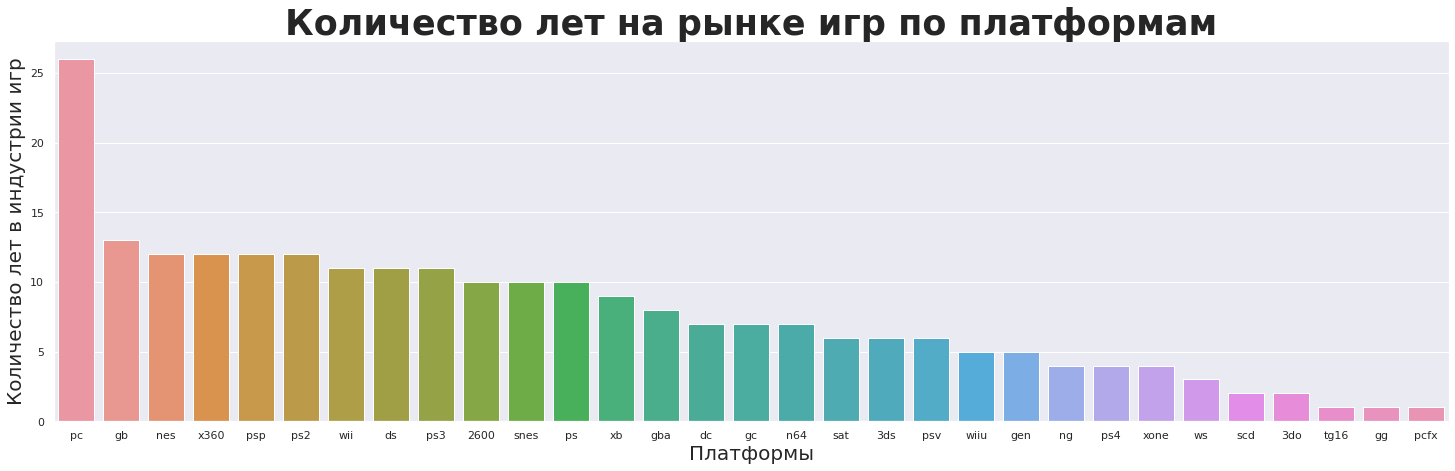

In [ ]:
# Создадим срез датафрейма по платформам и годам релизов и удалим дубликаты.
years_alive=data.loc[:,['platform','year_of_release']].drop_duplicates(subset=['platform', 'year_of_release'],keep='last')
# Посчитаем, сколько лет у каждой платформы были релизы игр.
years_mean=years_alive. pivot_table(index='platform', values='year_of_release', aggfunc='count')
# Выведем результат  в графике отсортировав по количеству лет.
years_mean=years_mean.sort_values ('year_of_release', ascending=False)
sns.set()
plt.figure(figsize = (25,7))
sns. barplot(x=years_mean.index, y='year_of_release', data = years_mean)
plt.title("Количество лет на рынке игр по платформам", fontsize = 35,fontweight='bold')
plt.xlabel("Платформы", fontsize = 20)
plt.ylabel("Количество лет в индустрии игр", fontsize = 20)
plt.show()

In [ ]:
# Выведем результат по среднему количеству лет, в которые платформа осуществляет выпуск новых игр на рынок.
print (f'Среднее количество лет существования платформы: {years_mean.mean().round()}')

Среднее количество лет существования платформы: year_of_release   8.00
dtype: float64


In [ ]:
# Сделаем группировку с целью найти самые первые/ранние годы с релизом по каждой платформе и отсортируем по году. Удалим старый индекс.
min_year_of_platform=years_alive.groupby('platform',as_index=False) ['year_of_release'].min().sort_values('year_of_release'). reset_index(drop=True)
# Создадим в датафрейме 'min_year_of_platform' новую колонку 'new' дубликат 'year_of_release', но со сдвигом вниз на 1 строку.
min_year_of_platform['new']=min_year_of_platform.year_of_release.shift(1)
# В ещё одной новой колонке 'dif' внесём результат разности колонок 'year_of_release' и 'new'.
min_year_of_platform['dif']=min_year_of_platform.year_of_release-min_year_of_platform.new
# удалим nan и сделаем фильтр по данным больше 0 в колонке 'dif'. Выведем описание данных с функцией describe.
min_year_of_platform.dropna(inplace=True)
min_year_of_platform.query('dif! =0').describe ()

,year_of_release,new,dif
count,19.00,19.00,19.00
mean,"1,998.16","1,996.42",1.74
std,8.82,8.98,1.10
min,"1,983.00","1,980.00",1.00
25%,"1,992.50","1,991.00",1.00
50%,"1,998.00","1,996.00",1.00
75%,"2,004.50","2,002.50",2.00
max,"2,013.00","2,012.00",5.00


In [ ]:
# Сделаем группировку с целью найти самые поздние/последние годы с релизом по каждой платформе и отсортируем по году. Удалим старый индекс.
max_year_of_platform=years_alive.groupby('platform',as_index=False) ['year_of_release'].max(). sort_values('year_of_release'). reset_index(drop=True)
# Создадим в датафрейме 'm ax_year_of_platform' новую колонку 'new' дубликат 'year_of_release', но со сдвигом вниз на 1 строку.
max_year_of_platform['new']=max_year_of_platform.year_of_release.shift(1)
# В ещё одной новой колонке 'dif' внесём результат разности колонок 'year_of_release' и 'new'.
max_year_of_platform['dif']=max_year_of_platform.year_of_release-max_year_of_platform.new
# удалим nan и сделаем фильтр по данным больше 0 в колонке 'dif'. Выведем описание данных с функцией describe. max_year_of_platform.dropna(inplace=True)
max_year_of_platform.query('dif! =0'). describe (). round (0)

,year_of_release,new,dif
count,15.00,14.00,14.00
mean,"2,003.00","2,002.00",2.00
std,9.00,8.00,1.00
min,"1,989.00","1,989.00",1.00
25%,"1,996.00","1,995.00",1.00
50%,"2,002.00","2,002.00",2.00
75%,"2,010.00","2,008.00",3.00
max,"2,016.00","2,015.00",4.00


**Вывод**

В данном разделе при исследовании данных мы увидели,что с 2012 года количество выпускаемых игр уменьшается. Решено взять для дальнейшего анализа период с 2012-2016,т.к. только в данном периоде показаны лидирующие позиции ps4 ,3ds и xone, остальные платформы имеют тенденцию к снижению продаж. Даже рассмотрение продаж в разрезе регионов не изменило лидерские позиции с тенденцией к росту указанных платформ.

Что касается жизненного цикла платформ: Если брать весь период по 'year_of_release', то в среднем через каждые 2 года какая-то из платформ перестает быть актуальной. И точно так же на всëм периоде с 1980 по 2016 год - каждый год в среднем появляется какая-то новая платформа. Среднее количество лет жизни платформы говорит нам о том, что после появления в среднем нужно 8 лет на наработку своей фанбазы и поиск своей ниши в игровой индустрии, о том что происходит дальше мы не можем узнать из данных. Ведь платформа может жить и на каких-то обновлениях к имеющимся играм или же каких-то дополнительных опциях к ним же. Нужно отметить, что средний срок 'жизни' платформы отмечается постепенным ростом продаж и также его постепенным снижением к окончанию срока.

### Подробный анализ платформ Xone ,Ps4 и 3ds в актуальном периоде.Рассмотрение влияния отзывов на продажи игр.

В данном разделе актуальным периодом для анализа признан 2012-2016 года. На основе данных прошлого раздела было выявлено 3 лидера: на первом месте ps4, на втором - xone и на третьем -3ds (т.к. является лидером на рынке в Японии).

In [ ]:
data_since2012. groupby('platform') ['total_game_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,396.00,0.49,1.39,0.01,0.04,0.11,0.31,14.60
ds,31.00,0.40,1.44,0.01,0.02,0.05,0.18,8.06
pc,251.00,0.25,0.49,0.01,0.03,0.08,0.24,5.14
ps3,493.00,0.59,1.46,0.01,0.05,0.20,0.61,21.05
ps4,392.00,0.80,1.61,0.01,0.06,0.20,0.73,14.63
psp,173.00,0.06,0.07,0.01,0.02,0.03,0.09,0.36
psv,411.00,0.12,0.20,0.01,0.02,0.05,0.12,1.96
wii,54.00,0.65,1.17,0.01,0.06,0.18,0.69,6.76
wiiu,147.00,0.56,1.06,0.01,0.08,0.22,0.53,7.09


Нужно отметить, что при одновременном появлении на рынке ps4 развивается более динамично по сравнению с xone и более рано появившейся - 3ds.

Построим диаграмму размаха по всем платформам. Сделаем несколько диаграмм с постепенным уменьшением диапазона, тем самым мы уберем редкие выбросы и оставим более частые выбросы, которые так же важны для анализа.

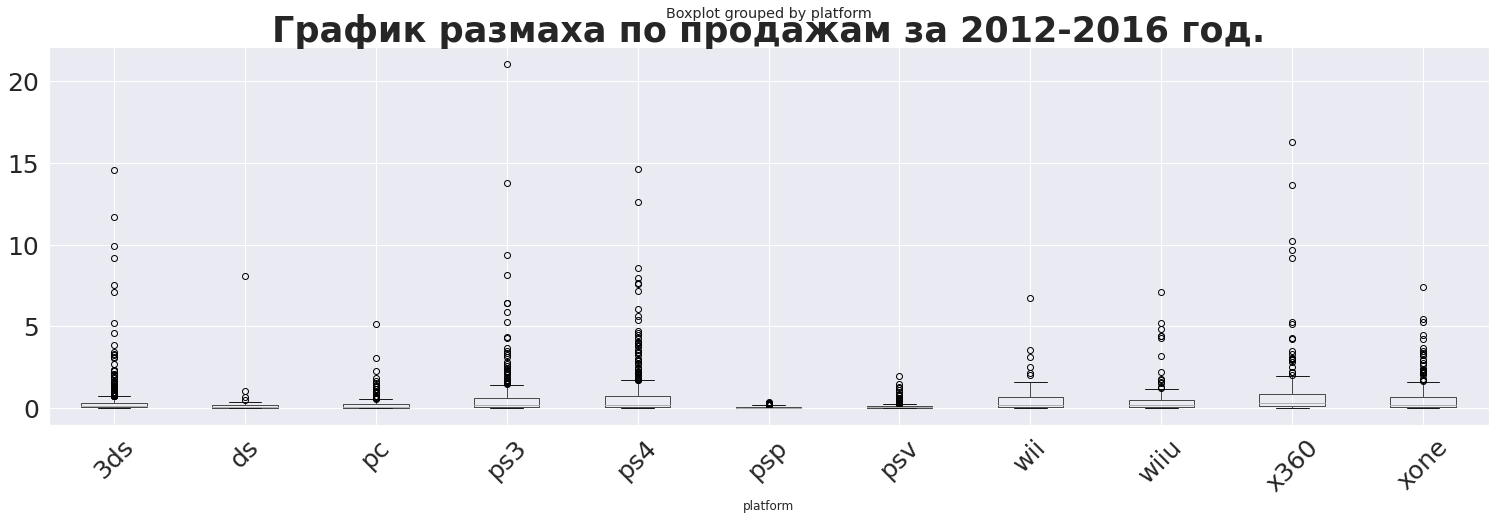

In [ ]:
# выводим диаграмму размаха общего плана
data_since2012.boxplot(column='total_game_sales', by='platform',figsize=(25,7),rot=45,fontsize=25)
plt.title('График размаха по продажам за 2012-2016 год.',fontsize=35,fontweight='bold')
plt.show()

В представленной диаграмме мы видим, что есть очень редкий выброс с продажами в 21 млн (видимо эта игра была очень популярная игра), так же редкие, в отличии от других, выбросы есть в диапазоне от 15 до 2 млн. Уберем эти выбросы и еще раз посмотрим на диаграмму размаха.

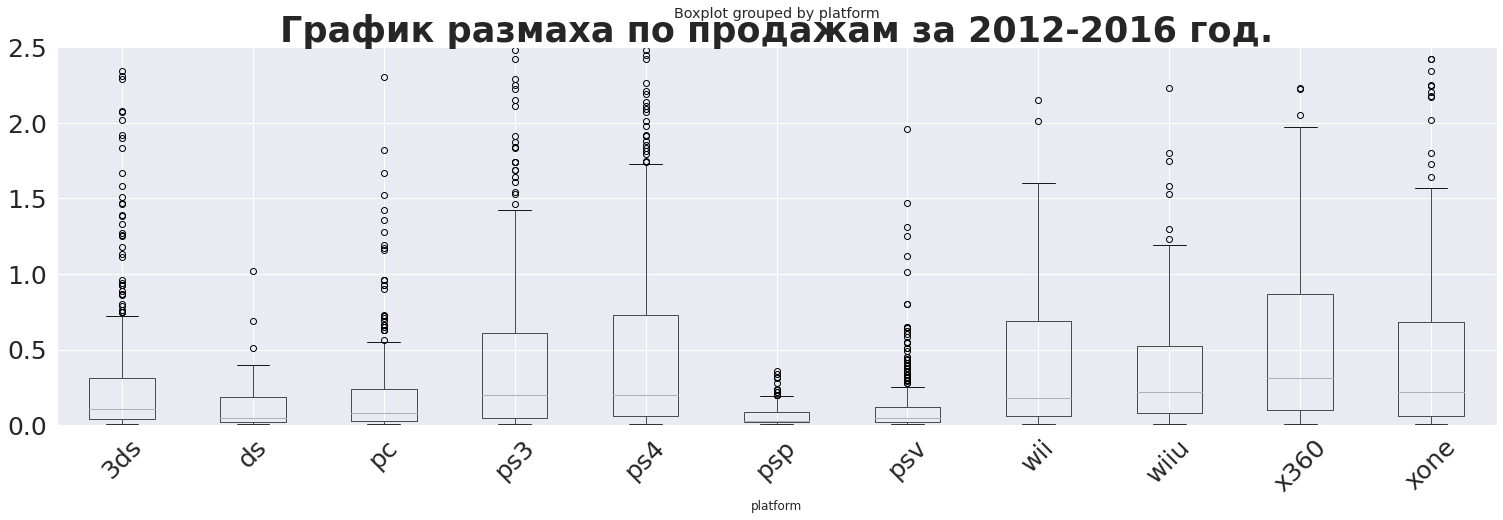

In [ ]:
# теперь сужаем диапазон до 2.5 млн продаж
data_since2012.boxplot(column='total_game_sales', by='platform',figsize=(25,7),rot=45,fontsize=25)
plt.title('График размаха по продажам за 2012-2016 год.',fontsize=35,fontweight='bold')
# подгоняем данные по стороне 'Y'
plt.ylim(0, 2.5)
plt.show()

Наблюдая график размаха выше, можно сказать, что медиана большинства платформ не превышает 0.25 млн. проданных копий игр. Так же по основной массе платформ выбросы находятся на уровне 2 млн. копий. Нижний квартиль у всех платформ находится на одном уровне. Верние квартили говорят о наличии датасетов с положительной скошенностью. Медианы ps4 и xone находятся на одном уровне, что говорит, что эти платформы прямые конкуренты.

Посмотрим, как влияют на продажи отзывы пользователей и критиков.

Диаграммы рассеивания по общим продажам и отзывам пользователей


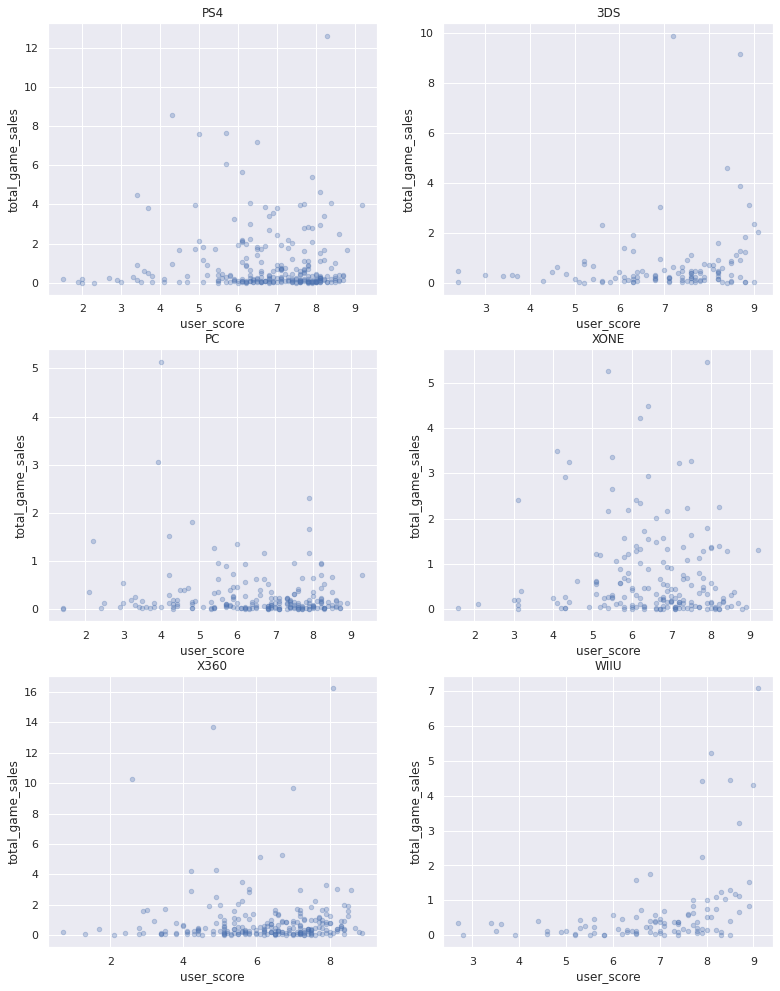

In [ ]:
# выведем графики рассеивания по платформам, отобразив отзывы пользователей.
print('Диаграммы рассеивания по общим продажам и отзывам пользователей')
fig, axis = plt.subplots(3,2, figsize=(25,12))
data_since2012.query('user_score!=-1').loc[data_since2012.platform=='ps4',['user_score','total_game_sales']].plot(ax=axis[0,0],title='PS4',x='user_score', y='total_game_sales', kind='scatter',style='o', alpha=0.3,figsize=(13, 17),grid=True)
data_since2012.query('user_score!=-1').loc[data_since2012.platform=='3ds',['user_score','total_game_sales']].plot(ax=axis[0,1],title='3DS',x='user_score', y='total_game_sales', kind='scatter',style='o', alpha=0.3,figsize=(13, 17),grid=True)
data_since2012.query('user_score!=-1').loc[data_since2012.platform=='pc',['user_score','total_game_sales']].plot(ax=axis[1,0],title='PC',x='user_score', y='total_game_sales', kind='scatter',style='o', alpha=0.3,figsize=(13, 17),grid=True)
data_since2012.query('user_score!=-1').loc[data_since2012.platform=='xone',['user_score','total_game_sales']].plot(ax=axis[1,1],title='XONE',x='user_score', y='total_game_sales', kind='scatter',style='o', alpha=0.3,figsize=(13, 17),grid=True)
data_since2012.query('user_score!=-1').loc[data_since2012.platform=='x360',['user_score','total_game_sales']].plot(ax=axis[2,0],title='X360',x='user_score', y='total_game_sales', kind='scatter',style='o', alpha=0.3,figsize=(13, 17),grid=True)
data_since2012.query('user_score!=-1').loc[data_since2012.platform=='wiiu',['user_score','total_game_sales']].plot(ax=axis[2,1],title='WIIU',x='user_score', y='total_game_sales', kind='scatter',style='o', alpha=0.3,figsize=(13, 17),grid=True)
plt.show()

Диаграммы рассеивания по общим продажам и отзывам критиков


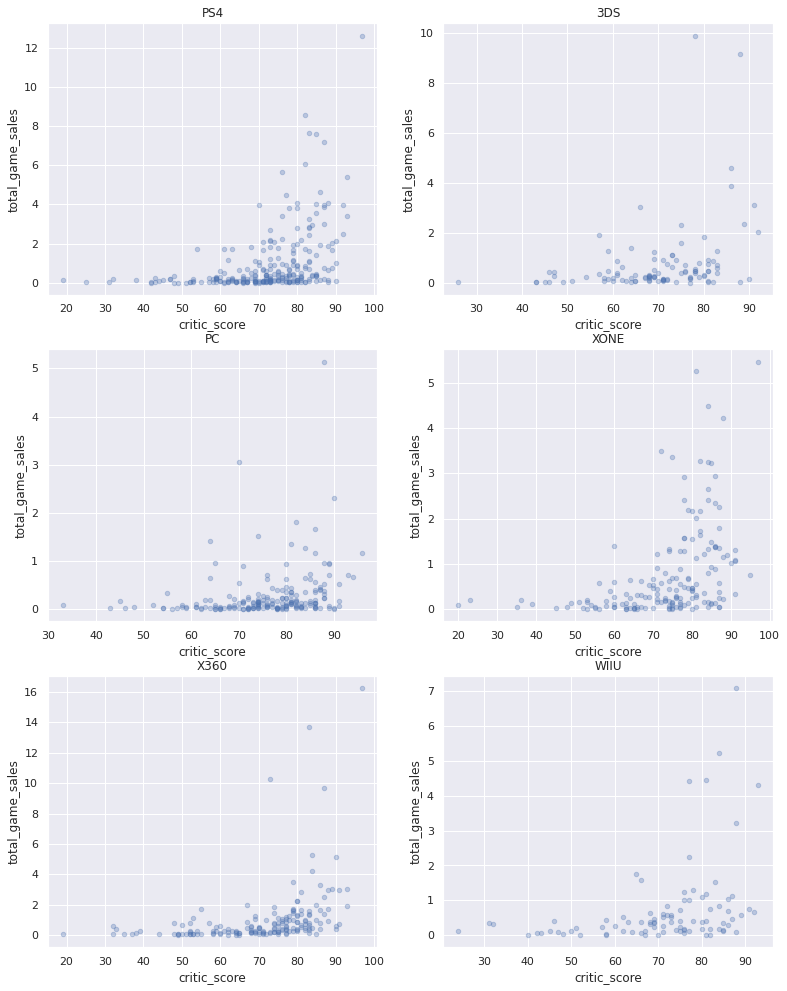

In [ ]:
# построим графики рассеивания по платформам, отобразив отзывы критиков.
print('Диаграммы рассеивания по общим продажам и отзывам критиков')
fig, axis = plt.subplots(3,2, figsize=(25,12))
data_since2012.query('critic_score!=0').loc[data_since2012.platform=='ps4',['critic_score','total_game_sales']].plot(ax=axis[0,0],title='PS4',x='critic_score', y='total_game_sales', kind='scatter',style='o', alpha=0.3,figsize=(13, 17),grid=True)
data_since2012.query('critic_score!=0').loc[data_since2012.platform=='3ds',['critic_score','total_game_sales']].plot(ax=axis[0,1],title='3DS',x='critic_score', y='total_game_sales', kind='scatter',style='o', alpha=0.3,figsize=(13, 17),grid=True)
data_since2012.query('critic_score!=0').loc[data_since2012.platform=='pc',['critic_score','total_game_sales']].plot(ax=axis[1,0],title='PC',x='critic_score', y='total_game_sales', kind='scatter',style='o', alpha=0.3,figsize=(13, 17),grid=True)
data_since2012.query('critic_score!=0').loc[data_since2012.platform=='xone',['critic_score','total_game_sales']].plot(ax=axis[1,1],title='XONE',x='critic_score', y='total_game_sales', kind='scatter',style='o', alpha=0.3,figsize=(13, 17),grid=True)
data_since2012.query('critic_score!=0').loc[data_since2012.platform=='x360',['critic_score','total_game_sales']].plot(ax=axis[2,0],title='X360',x='critic_score', y='total_game_sales', kind='scatter',style='o', alpha=0.3,figsize=(13, 17),grid=True)
data_since2012.query('critic_score!=0').loc[data_since2012.platform=='wiiu',['critic_score','total_game_sales']].plot(ax=axis[2,1],title='WIIU',x='critic_score', y='total_game_sales', kind='scatter',style='o', alpha=0.3,figsize=(13, 17),grid=True)
plt.show()

Как видно из графиков выше корреляция между отзывами пользователей, критиков и продажами довольно слабая, т. к. все точки на графиках в основном 'лежат' на оси х. Так же надо отметить наличие 0 отзывов на каждом графике. Посмотрим в таблице ниже на числовое сравнение коэффициентов корреляции по этим же показателям.

In [ ]:
# создадим список платформ датафрэйма.
pltf=['wiiu','pc','x360','xone','3ds','ps4']
# сделаем пустой датафрейм для дальнейшего его заполнения.
df_corr =pd.DataFrame(columns=['platforms','user_score_corr','critic_score_corr'])
# переменные для передачи результатов расчета корреляции.
m,p,f=0,0,0
for i in pltf:
  # передаем в f срез датафрейма по итерируемому списку с платформами и оставляем в нем только нужные колонки.
  f=data_since2012.loc[:,['platform','user_score', 'critic_score','total_game_sales']].query('platform==@i and user_score!=-1')
  v=data_since2012.loc[:,['platform','user_score', 'critic_score','total_game_sales']].query('platform==@i and critic_score!=0')
  # по данным среза в f рассчитываем корреляцию оценок и общих продаж в актуальном периоде.
  m=f[['user_score','total_game_sales']].corr()
  p=v[['critic_score','total_game_sales']].corr()
  df_corr = df_corr.append({'platforms': i,'user_score_corr': m.loc['total_game_sales','user_score'],
                    'critic_score_corr': p.loc['total_game_sales','critic_score'],                   }
                   ,ignore_index=True
                  )
df=df_corr.query('user_score_corr==user_score_corr').reset_index(drop=True)
df

,platforms,user_score_corr,critic_score_corr
0,wiiu,0.40,0.35
1,pc,-0.12,0.24
2,x360,0.01,0.36
3,xone,-0.07,0.42
4,3ds,0.20,0.32
5,ps4,-0.03,0.41


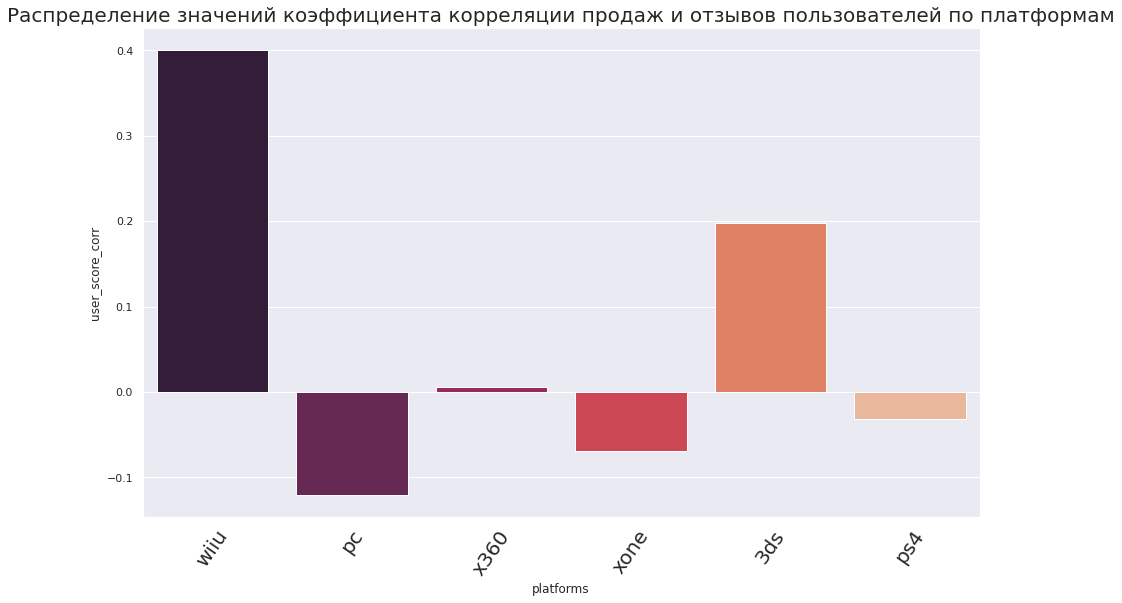

In [ ]:
plt.figure(figsize=(15,9))
g = sns.barplot(data=df, x='platforms', y='user_score_corr', ci=False, palette='rocket')
g.set_xticklabels(df['platforms'], rotation=55, fontdict={'fontsize':20})
g.set_title('Распределение значений коэффициента корреляции продаж и отзывов пользователей по платформам',fontdict={'fontsize':20})
plt.show()

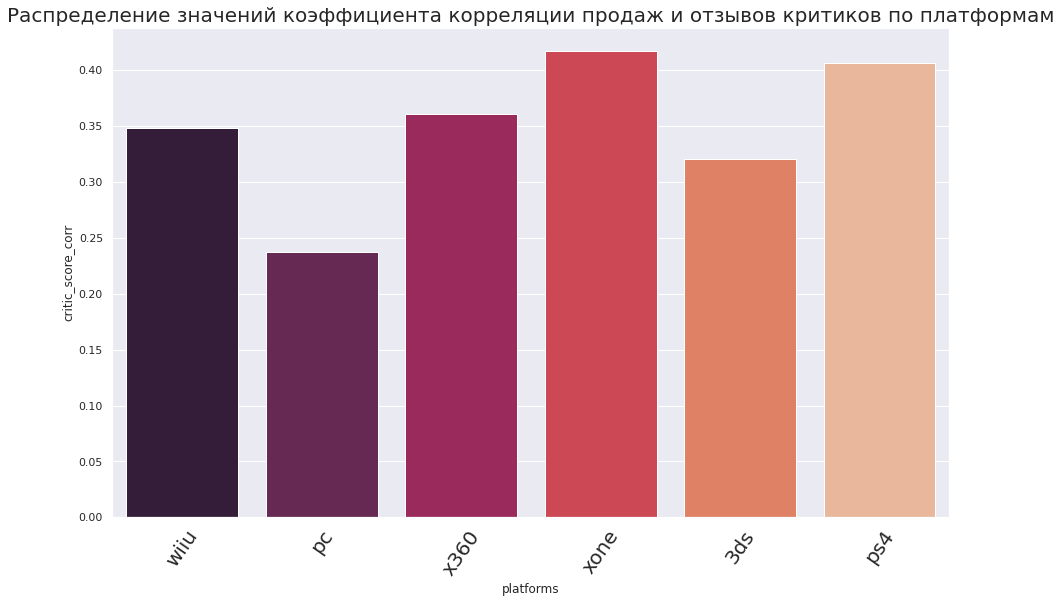

In [ ]:
plt.figure(figsize=(15,9))
g = sns.barplot(data=df, x='platforms', y='critic_score_corr', ci=False, palette='rocket')
g.set_xticklabels(df['platforms'], rotation=55, fontdict={'fontsize':20})
g.set_title('Распределение значений коэффициента корреляции продаж и отзывов критиков по платформам',fontdict={'fontsize':20})
plt.show()

Рассмотрев графики выше можно прийти к выводу о том, что в оценка критиков, на примере ps4,xone может оказывать большее влияние на продажи игр, чем оценка пользователей, но в целом уровень показателя корреляции не высокий.

In [ ]:
# посмотрим общие показатели продаж по всем платформам.
data_since2012.groupby('platform')['total_game_sales'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
psp,173.00,0.06,0.07,0.01,0.02,0.03,0.09,0.36
psv,411.00,0.12,0.20,0.01,0.02,0.05,0.12,1.96
pc,251.00,0.25,0.49,0.01,0.03,0.08,0.24,5.14
ds,31.00,0.40,1.44,0.01,0.02,0.05,0.18,8.06
3ds,396.00,0.49,1.39,0.01,0.04,0.11,0.31,14.60
wiiu,147.00,0.56,1.06,0.01,0.08,0.22,0.53,7.09
ps3,493.00,0.59,1.46,0.01,0.05,0.20,0.61,21.05
xone,247.00,0.65,1.04,0.01,0.06,0.22,0.69,7.39
wii,54.00,0.65,1.17,0.01,0.06,0.18,0.69,6.76


**Вывод**

Итак в данном разделе мы увидели, что ps4 развивается более динамично по сравнению с xone и 3ds. Диаграмма размаха показала,что медиана большинства платформ не превышает 0.25 млн. проданных копий игр. Так же по основной массе платформ выбросы находятся на уровне 2 млн. копий. Нижний квартиль у всех платформ находится на одном уровне. Верние квартили говорят о наличии датасетов с положительной скошенностью. Медианы ps4 и xone находятся на одном уровне, что говорит, что эти платформы прямые конкуренты.
По части влияния оценки пользователей и критиков: были построены диаграммы рассеивания и рассчитаны коэффициенты корреляции по 6 платформам включая xone,3ds и ps4 для того,чтобы иметь возможность сравнить результаты исследования.В итоге полученные данные показали, что зависимость продаж от оценки пользователей ниже, чем от оценки критиков у платформ xone,3ds и ps4 . Эту же информацию нам подтвердили данные по корреляции по остальным платформам.

По полученным данным можно сказать, что индустрия игр не является стабильной отраслью, в ней всё быстро меняется. На период 2012-2016 год выручка имеет нисходящий тренд.

Топ платформы: PS4, XOne, 3DS;

### Обзор распределения игр по жанрам в актуальном периоде.

In [ ]:
# Посмотрим на распределение глобальных продаж по жанрам игр в актуальном периоде.
# Далее по этим же данным построим круговую диаграмму.
genre_research = data_since2012.pivot_table(index = 'genre', values = 'total_game_sales', aggfunc = ['median','count'])
genre_research.columns=['median_sales','count_sales']
genre_research=genre_research.sort_values('median_sales',ascending=False)
genre_research

,median_sales,count_sales
genre,,
shooter,0.44,235
sports,0.24,268
platform,0.21,85
racing,0.14,115
role-playing,0.14,370
fighting,0.13,109
action,0.12,1032
misc,0.12,192
simulation,0.12,80


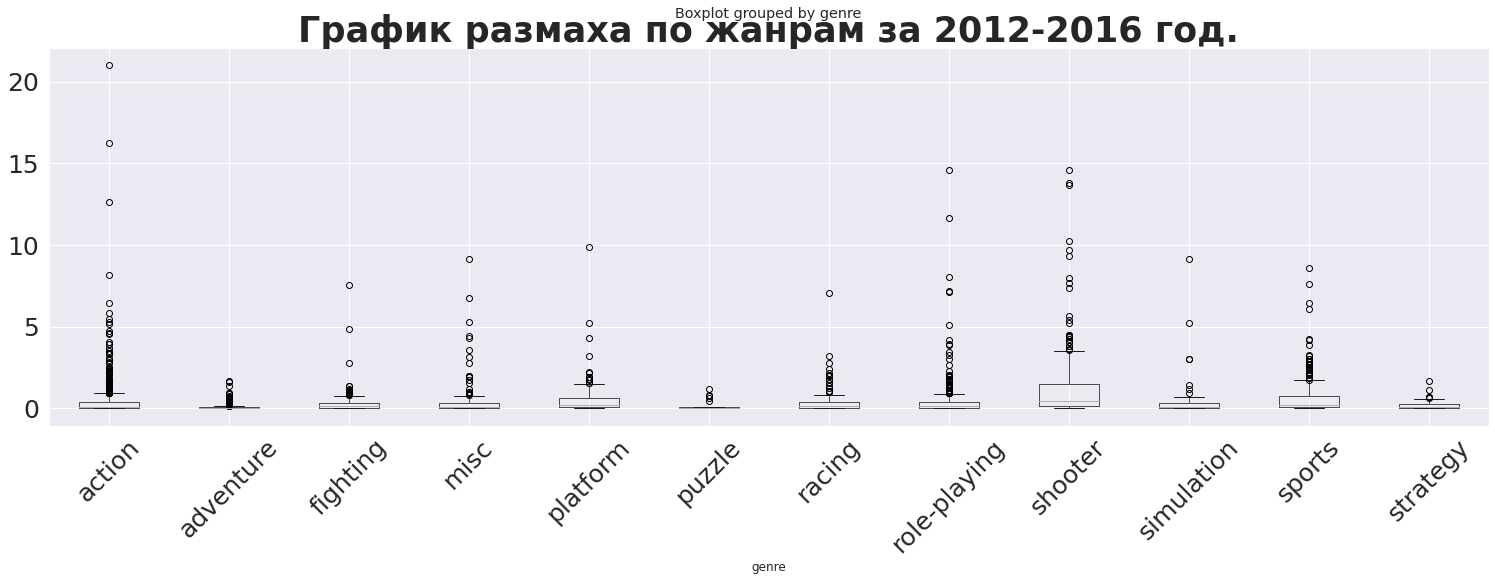

In [ ]:
# построим график размаха по жанрам.
data_since2012.boxplot(column='total_game_sales', by='genre',figsize=(25,7),rot=45,fontsize=25)
plt.title('График размаха по жанрам за 2012-2016 год.',fontsize=35,fontweight='bold')
plt.show()

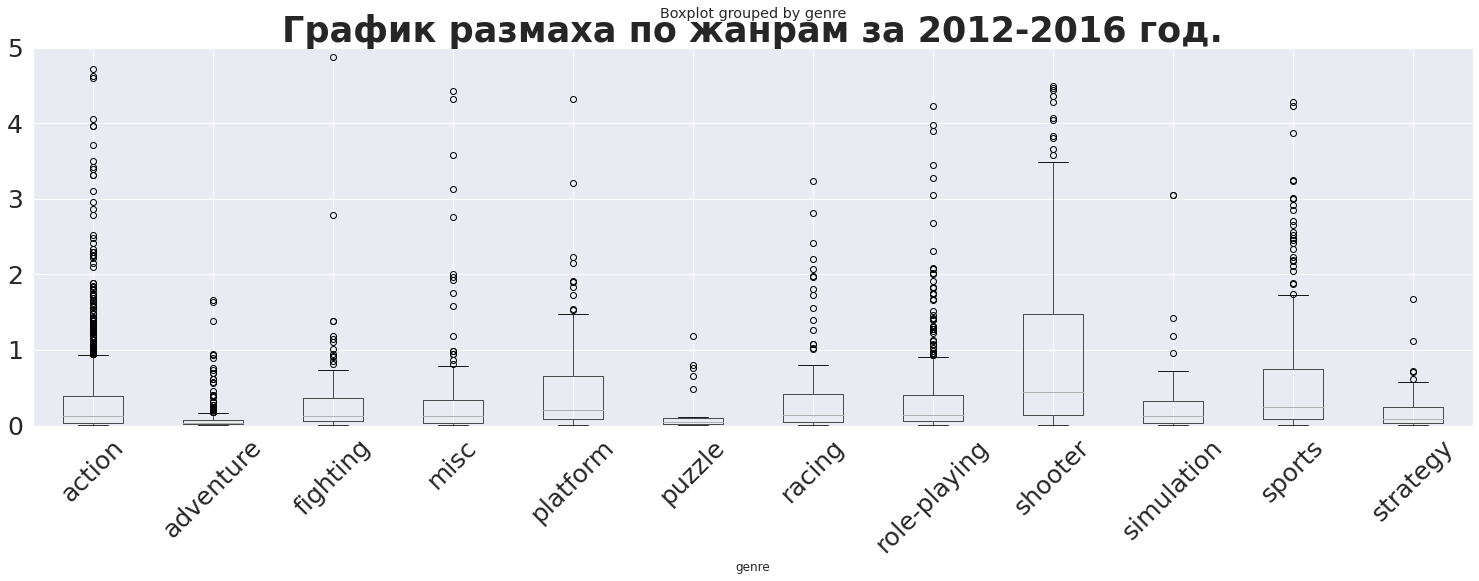

In [ ]:
# увеличим размер графиков срезав часть выбросов.
data_since2012.boxplot(column='total_game_sales', by='genre',figsize=(25,7),rot=45,fontsize=25)
plt.title('График размаха по жанрам за 2012-2016 год.',fontsize=35,fontweight='bold')
plt. ylim(0, 5)
plt.show()

In [ ]:
# создадим датафрейм для конкатенации,куда положим платформы не вошедшие в топ-5.
temp_df = pd.DataFrame(data=[{'genre':'other',
                              'median_sales':genre_research['median_sales'][5:].sum(),
                              'count_sales':genre_research['count_sales'][5:].sum()}],
                       columns=['median_sales','count_sales'],index={'other'})

genre_total=pd.concat([genre_research[:5], temp_df], axis=0)

Диаграмма распределения медианных продаж по жанрам


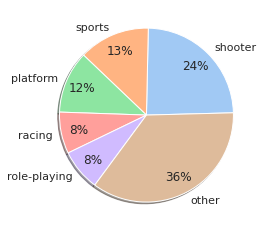

In [ ]:
# зафиксируем в переменной 'colors' цветовую схему для графика ниже.
colors = sns.color_palette('pastel')

# построим график для визуальзации данных с применением переменных 'colors' и 'dt'.
print("Диаграмма распределения медианных продаж по жанрам")
plt.pie(genre_total.median_sales,labels = genre_total.index.tolist(), colors = colors, autopct='%.0f%%',pctdistance=0.8, startangle=1.5,shadow=True)
plt.show()

В круговой диаграмме мы можем выделить ТОП-5 популярных жанров:

1.shooter

2.sports

3.platform

4.racing

5.role-playing

Самые низкие продажи выделены на графики выше в категорию 'other' в неё вошли в порядке убывания жанры: misc,simulation, strategy, adventure, puzzle.

Посмотрим, на какие жанры 'делают ставку' платформы ps4, xone и 3ds.

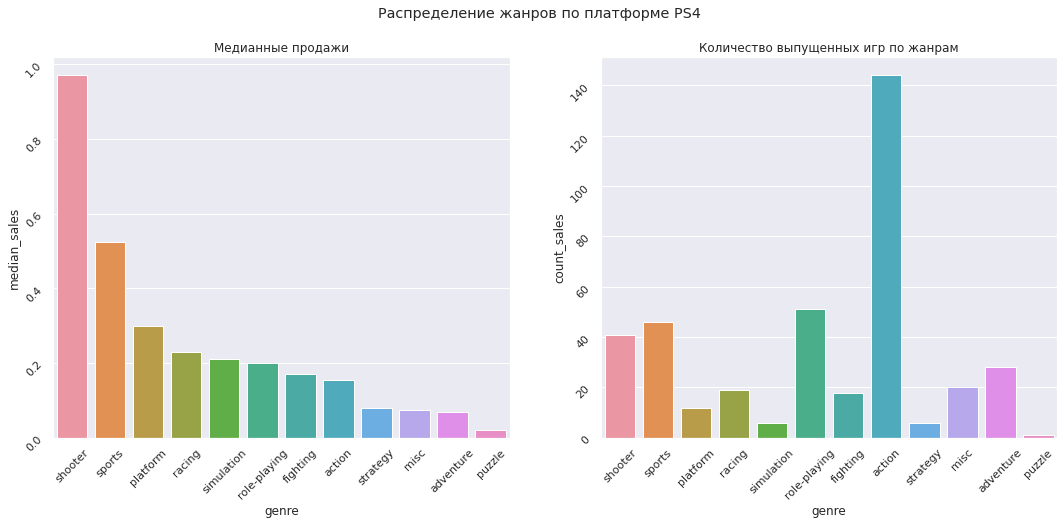

In [ ]:
# сделаем отбор по платформе и посмотрим, как распределены жанры по медианным продажам и количеству выпущенных игр.
ps4_genre=data_since2012.query("platform in ['ps4']").pivot_table(index = 'genre', values = 'total_game_sales', aggfunc = ['median','count']). reset_index()
ps4_genre. columns=['genre','median_sales', 'count_sales']
ps4_genre. sort_values ('median_sales', inplace=True,ascending=False,ignore_index=True)
# построим графики распределения.
fig, axes = plt.subplots(1,2, figsize=(18,7))
fig.suptitle('Распределение жанров по платформе PS4')
sns.barplot(ax=axes[0],data=ps4_genre, x='genre', y="median_sales")
axes[0].set_title("Медианные продажи")
axes[0].tick_params(labelrotation=45)
sns.barplot(ax=axes[1],data=ps4_genre, x='genre', y="count_sales")
axes[1].set_title("Количество выпущенных игр по жанрам")
axes[1].tick_params(labelrotation=45)
plt.show()

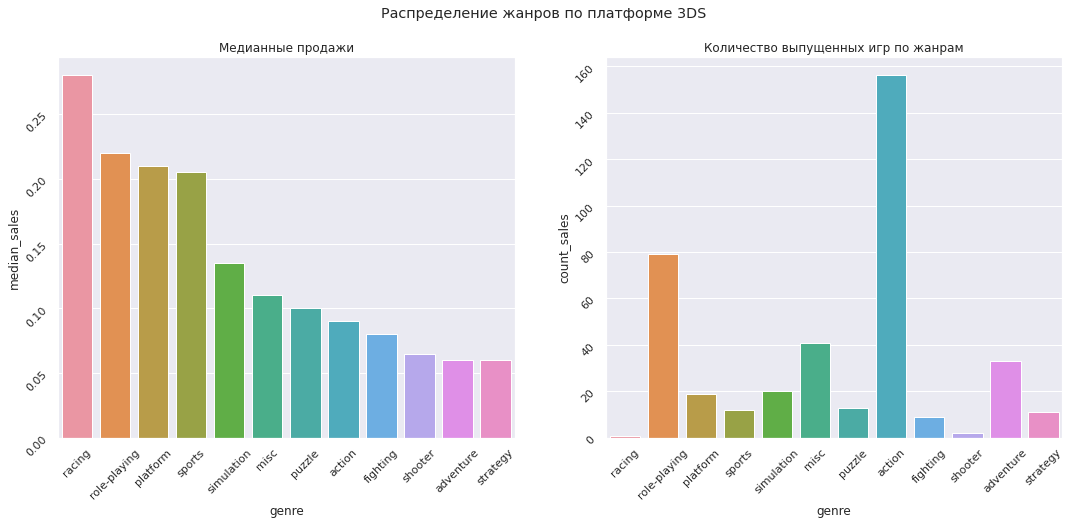

In [ ]:
# сделаем отбор по платформе и посмотрим, как распределены жанры по медианным продажам и количеству выпущенных игр.
ds3_genre=data_since2012.query("platform in ['3ds']").pivot_table(index = 'genre', values = 'total_game_sales', aggfunc = ['median','count']). reset_index()
ds3_genre. columns=['genre','median_sales', 'count_sales']
ds3_genre. sort_values ('median_sales', inplace=True,ascending=False,ignore_index=True)
# построим графики распределения.
fig, axes = plt.subplots(1,2, figsize=(18,7))
fig.suptitle('Распределение жанров по платформе 3DS')
sns.barplot(ax=axes[0],data=ds3_genre, x='genre', y="median_sales")
axes[0].set_title("Медианные продажи")
axes[0].tick_params(labelrotation=45)
sns.barplot(ax=axes[1],data=ds3_genre, x='genre', y="count_sales")
axes[1].set_title("Количество выпущенных игр по жанрам")
axes[1].tick_params(labelrotation=45)
plt.show()

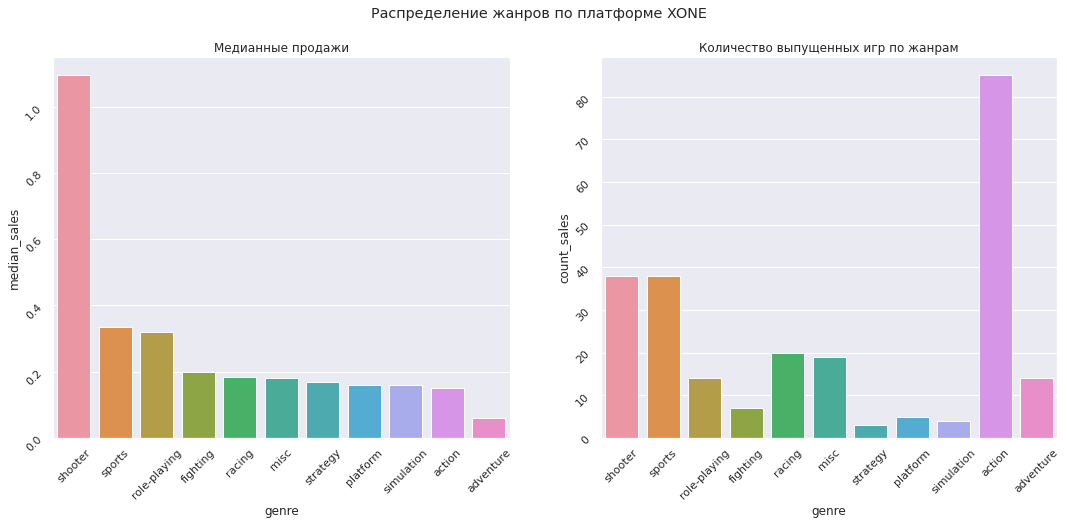

In [ ]:
# сделаем отбор по платформе и посмотрим, как распределены жанры по медианным продажам и количеству выпущенных игр.
xone_genre=data_since2012.query("platform in ['xone']").pivot_table(index = 'genre', values = 'total_game_sales', aggfunc = ['median','count']). reset_index()
xone_genre. columns=['genre','median_sales', 'count_sales']
xone_genre. sort_values ('median_sales', inplace=True,ascending=False,ignore_index=True)
# построим графики распределения.
fig, axes = plt.subplots(1,2, figsize=(18,7))
fig.suptitle('Распределение жанров по платформе XONE')
sns.barplot(ax=axes[0],data=xone_genre, x='genre', y="median_sales")
axes[0].set_title("Медианные продажи")
axes[0].tick_params(labelrotation=45)
sns.barplot(ax=axes[1],data=xone_genre, x='genre', y="count_sales")
axes[1].set_title("Количество выпущенных игр по жанрам")
axes[1].tick_params(labelrotation=45)
plt.show()

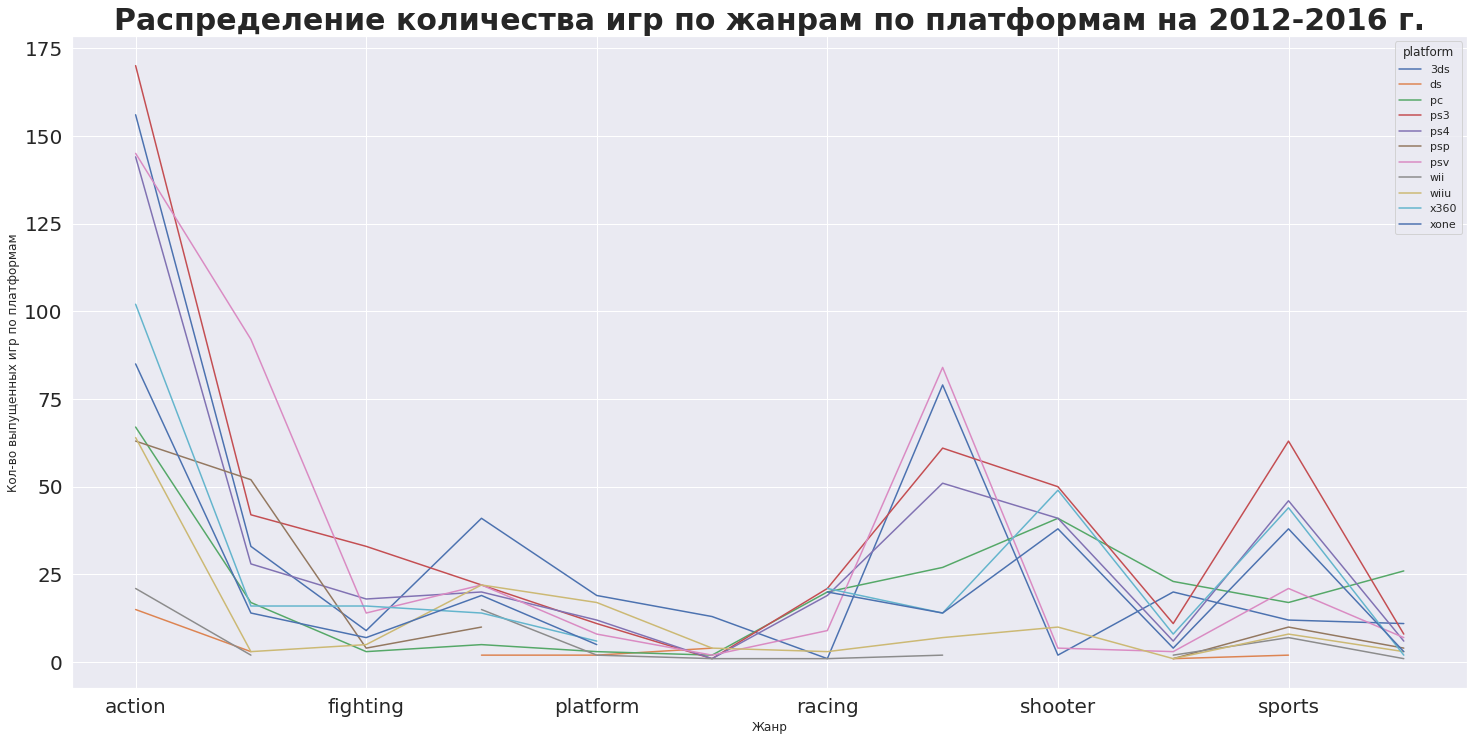

In [ ]:
data_since2012.pivot_table(index='genre', columns = 'platform', values='total_game_sales', aggfunc='count').plot(kind='line',grid=True, figsize=(25, 12),fontsize=20,xlabel='Жанр', ylabel='Кол-во выпущенных игр по платформам')
plt. title ('Распределение количества игр по жанрам по платформам на 2012-2016 г.', fontsize=30,fontweight='bold')
plt.show()

**Вывод**

Если рассматривать глобальный рынок, то большей популярностью пользуются в порядке убывания следующие жанры игр:

1.shooter

2.sports

3.platform

4.racing

5.role-playing



Наименее популярны adventure и puzzle.

Мы проанализировали количество продаж копий игр по платформам ps4,xone и 3dd и выяснили, что больше всего выпускают игр в жанре action для всех 3х платформ, но при этом лидером по медианным продажам у ps4, xone платформ является жанр shooter,а у 3ds - racing, что соответствует данным по медианным продажам на общем рынке. Если посмотреть на количество выпускаемых игр по жанрам для каждой из платформ, то можно увидеть, что чаще всего большинство из них занято выпуском игр именно в жанре 'action' в надежде, что какая-то из игр этого жанра завоюет рынок и станет лидером по продажам.


### Составление портрета типичного пользователя по регионам продаж (NA, EU, JP) в рамках актуального периода.

Для начала посмотрим ещё раз на то, какие платформы популярны по каждому региону на период с 2012 по 2016 год:

In [ ]:
# создадим переменную 'data_5years' для анализа распределения продаж по регионам и платформам в актуальном периоде.
data_5years=data_since2012.pivot_table(index=['platform'],
                                       values=['na_sales','eu_sales','jp_sales','other_sales', 'total_game_sales'],
                                       aggfunc='sum',
                                       fill_value='nothing',
                                       margins=True)
# отсортируем данные.
data_5years.sort_values ('total_game_sales',inplace=True)
display (data_5years)
# обновим переменную,убрав внизу строку итогов для дальнейшего использования таблицы.
data_5years.drop('All', axis=0,inplace=True)

,eu_sales,jp_sales,na_sales,other_sales,total_game_sales
platform,,,,,
psp,0.42,10.47,0.13,0.17,11.19
ds,3.53,3.72,4.59,0.71,12.55
wii,11.92,3.39,17.45,2.61,35.37
psv,11.36,21.04,10.98,5.80,49.18
pc,38.01,0.00,19.18,5.81,63.00
wiiu,25.13,13.01,38.10,5.95,82.19
xone,51.59,0.34,93.12,14.27,159.32
3ds,42.64,87.79,55.31,8.87,194.61
x360,74.52,1.57,140.05,20.40,236.54


Графики распределения продаж по отдельным рынкам с указанием платформ


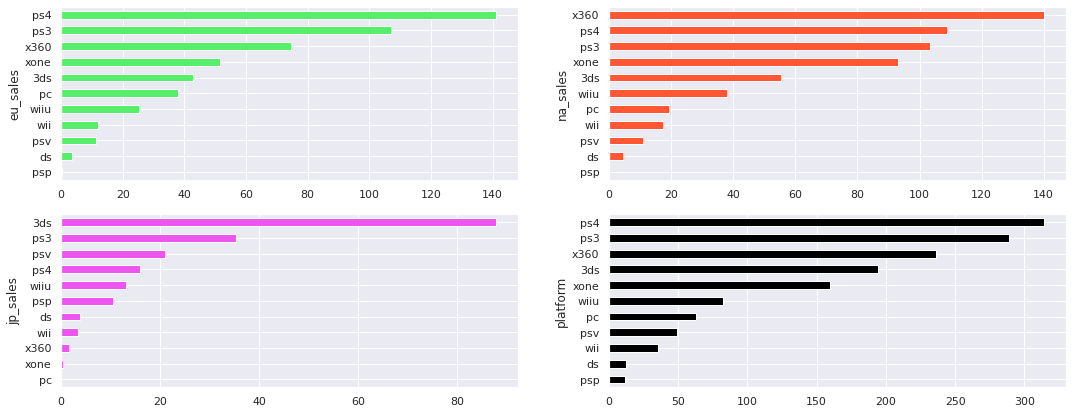

In [ ]:
fig, axis = plt.subplots(2,2, figsize=(18,7))
print('Графики распределения продаж по отдельным рынкам с указанием платформ')
data_5years['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0], color = '#56EE6A').set(ylabel='eu_sales');
data_5years['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1], color = '#FF5733').set(ylabel='na_sales');
data_5years['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0], color = '#EC56EE').set(ylabel='jp_sales');
data_5years['total_game_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,1], color = 'black')

plt. show()

Итак мы видим, что топ-5 популярных платформ по рынкам продаж представлены в порядке убывания:

EU: ps4, ps3, x360,xone,3ds- Европа

JP: 3ds, ps3, psv, ps4,wiiu - Япония

NA: x360,ps4,ps3,xone,3ds- CША

In [ ]:
sales_total=data_since2012.groupby('platform')['na_sales', 'jp_sales' ,'eu_sales', 'total_game_sales'].sum(). sort_values ('total_game_sales', ascending=False)
sales_total['na_pers']=sales_total.na_sales/sales_total.total_game_sales
sales_total['jp_pers']=sales_total.jp_sales/sales_total.total_game_sales
sales_total['eu_pers']=sales_total.eu_sales/sales_total.total_game_sales
sales_total

,na_sales,jp_sales,eu_sales,total_game_sales,na_pers,jp_pers,eu_pers
platform,,,,,,,
ps4,108.74,15.96,141.09,314.14,0.35,0.05,0.45
ps3,103.38,35.29,106.86,288.79,0.36,0.12,0.37
x360,140.05,1.57,74.52,236.54,0.59,0.01,0.32
3ds,55.31,87.79,42.64,194.61,0.28,0.45,0.22
xone,93.12,0.34,51.59,159.32,0.58,0.00,0.32
wiiu,38.10,13.01,25.13,82.19,0.46,0.16,0.31
pc,19.18,0.00,38.01,63.00,0.30,0.00,0.60
psv,10.98,21.04,11.36,49.18,0.22,0.43,0.23
wii,17.45,3.39,11.92,35.37,0.49,0.10,0.34


Графики распределения долей продаж по отдельным рынкам к общим продажам с указанием платформ


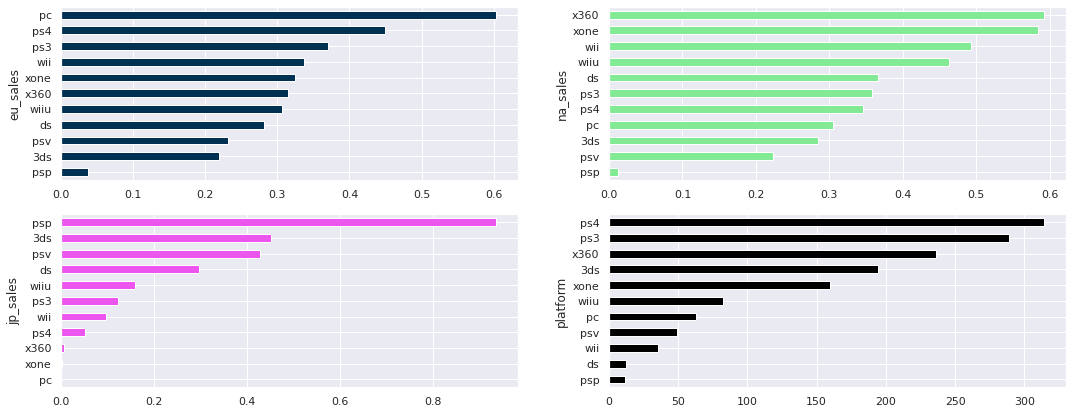

In [ ]:
fig, axis = plt.subplots(2,2, figsize=(18,7))
print('Графики распределения долей продаж по отдельным рынкам к общим продажам с указанием платформ')
sales_total['eu_pers'].sort_values(ascending=True).plot.barh(ax=axis[0,0], color = '#003153').set(ylabel='eu_sales');
sales_total['na_pers'].sort_values(ascending=True).plot.barh(ax=axis[0,1], color = '#82e994').set(ylabel='na_sales');
sales_total['jp_pers'].sort_values(ascending=True).plot.barh(ax=axis[1,0], color = '#EC56EE').set(ylabel='jp_sales');
sales_total['total_game_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,1], color = 'black')

plt. show()

Топ-5 популярных платформ по рынкам продаж в долях участия в общих продажах представлены в порядке убывания:

EU: pc, ps4, ps3,wii,xone- Европа

JP: psp,3ds,pcv,ds,wiiu- Япония

NA: x360,xone,wii,wiiu,ds- CША

*Самые популярные жанры по рынкам продаж.*

Графики распределения медианных продаж по отдельным рынкам с учетом жанров


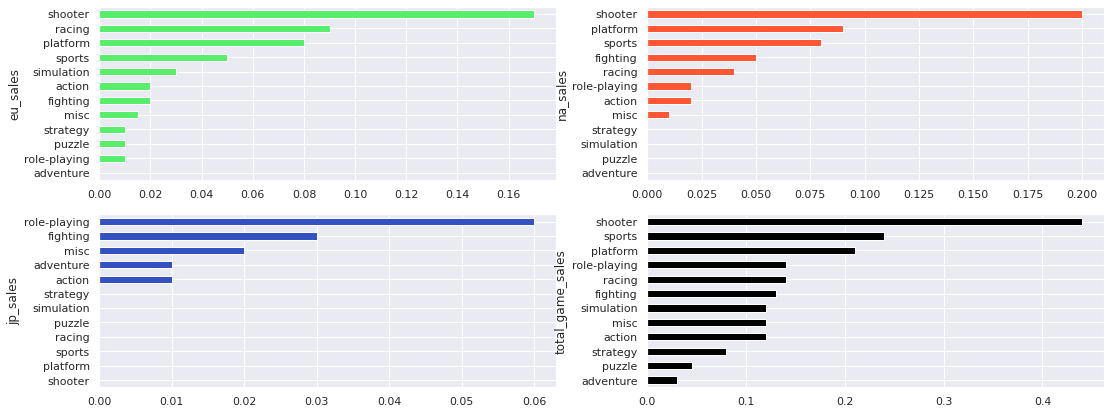

In [ ]:
data_5years_g = data_since2012.pivot_table(['na_sales','eu_sales','jp_sales','other_sales','total_game_sales'], ['genre'], aggfunc='median').sort_values(by='na_sales', ascending=False)
data_5years_g_sum = data_since2012.pivot_table(['na_sales','eu_sales','jp_sales','other_sales','total_game_sales'], ['genre'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
print('Графики распределения медианных продаж по отдельным рынкам с учетом жанров')
fig, axis = plt.subplots(2,2, figsize=(18,7))

data_5years_g['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0], color = '#56EE6A').set(ylabel='eu_sales')
data_5years_g['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1], color = '#FF5733').set(ylabel='na_sales')
data_5years_g['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0], color = '#3351c1').set(ylabel='jp_sales')
data_5years_g['total_game_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,1], color = 'black').set(ylabel='total_game_sales')
plt. show()

Графики распределения суммарных продаж по отдельным рынкам с учетом жанров


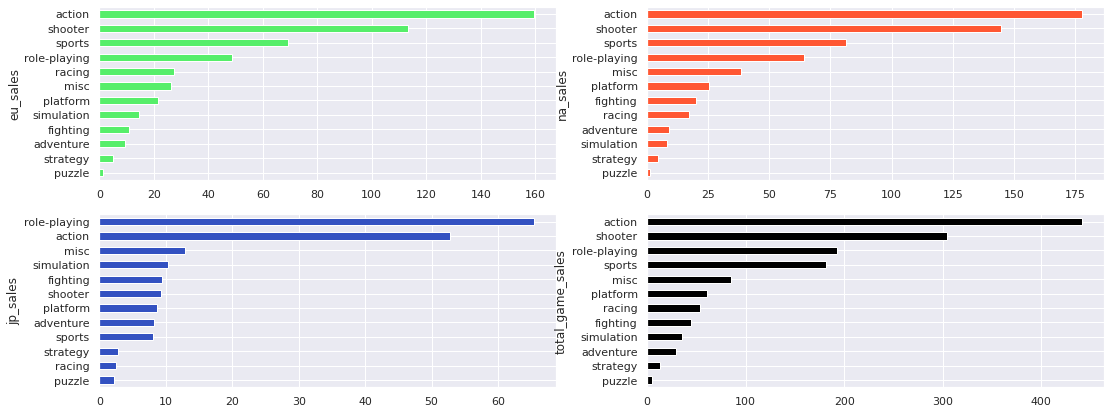

In [ ]:
print('Графики распределения суммарных продаж по отдельным рынкам с учетом жанров')
fig, axis = plt.subplots(2,2, figsize=(18,7))

data_5years_g_sum['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0], color = '#56EE6A').set(ylabel='eu_sales');
data_5years_g_sum['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1], color = '#FF5733').set(ylabel='na_sales');
data_5years_g_sum['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0], color = '#3351c1').set(ylabel='jp_sales');
data_5years_g_sum['total_game_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,1], color = 'black').set(ylabel='total_game_sales');

Графики распределения популярных жанров по рынкам.


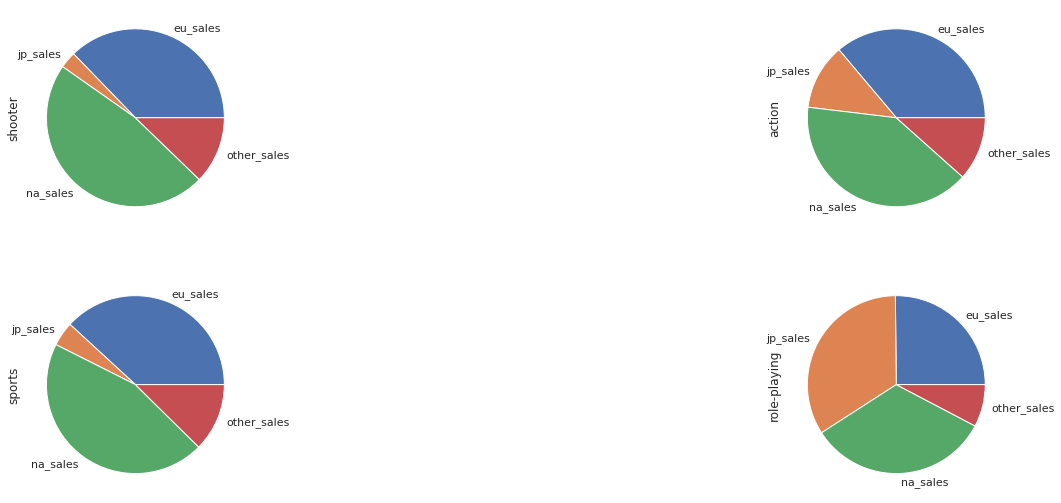

In [ ]:
# посмотрим распределение популярных жанров по рынкам.
print('Графики распределения популярных жанров по рынкам.')
fig, axis = plt.subplots(2,2, figsize=(25,9))
data_5years_g_sum.loc['shooter',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,0])
data_5years_g_sum.loc['action',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,1])
data_5years_g_sum.loc['sports',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,0])
data_5years_g_sum.loc['role-playing',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,1])
plt. show()

Итак мы видим, что топ-5 популярных жанров по рынкам продаж представлены в порядке убывания:

По медианным продажам:

EU: shooter,racing,platform,sports,simulation- Европа

JP: role-playing,fighting,misc,adventure,action- Япония

NA: shooter,platform,sports,fighting,racing- CША

По суммарным продажам:

EU: action,shooter,sports,role-playing,racing- Европа

JP:role-playing,action,misc,simulation,fighting - Япония

NA: action,shooter,sports,role-playing,misc - CША

Построены круговые диаграммы для того, что увидеть как распределены популярные жанры по регионам: распределение соответствует долям регионов в общей сумме продаж. Жанры 'shooter', 'sports', 'platform' - первое место занимает регион NA, на втором EU,исключение жанр 'role_playing',который пользуется большим успехом в Японии.

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

Графики распределения рейтинга по рынкам продаж


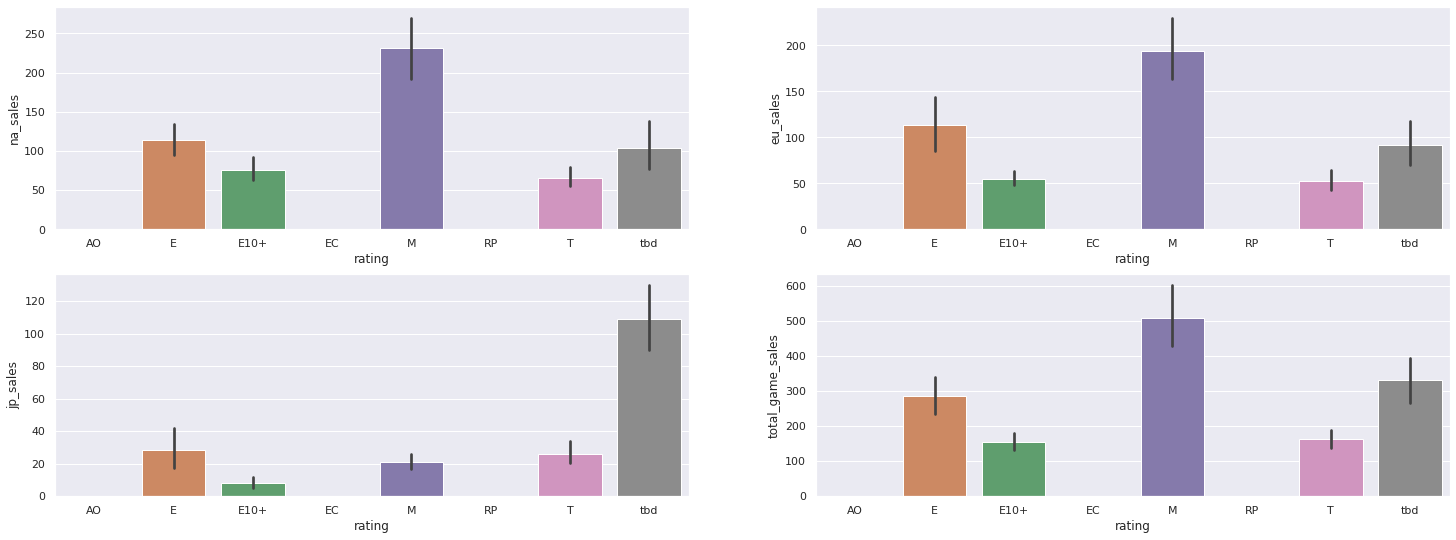

In [ ]:
# создадим таблицу для рассмотрения, как влияет рейтинг  ESRB на продажи игр по каждому рынку.
print('Графики распределения рейтинга по рынкам продаж')
fig, axis = plt.subplots(2,2, figsize=(25,9))
sns.barplot(y='na_sales', x='rating', data = data_since2012,estimator=sum, ax=axis[0,0])
sns.barplot(y='eu_sales', x='rating', data = data_since2012,estimator=sum, ax=axis[0,1])
sns.barplot(y='jp_sales', x='rating', data = data_since2012,estimator=sum, ax=axis[1,0])
sns.barplot(y='total_game_sales', x='rating', data = data_since2012,estimator=sum, ax=axis[1,1])
plt. show()

Рейтинг ESRB оказывает влияние,но не на все регионы. Япония меньше всех использует данный рейтинг.

In [ ]:
# Комментарий ревьюера
temp = data_since2012.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


tbd     1275
M        499
T        412
E        395
E10+     306
AO         0
EC         0
RP         0
Name: rating, dtype: int64

**Вывод**

Типичные пользователи Европы и Америки предпочитают играть в:
1.shooter
2.action
3.sports

на платформах:
1.ps4
2.xone

при этом стабильно покупают: shooter

Пользователь в Японском регионе отличается от первых двух регионов:
предпочитает играть в:
1.role-playing
2.action
3.shooter

на платформах:
1.3ds
2.ps4

при этом стабильно покупает: role-playing

Рейтинг ESRB влияет на европейских и американских игроков, кроме региона - Япония, здесь суvмарные продажи у игр без рейтинга выше.

### Вывод

В данной части работы было отмечено,что с 2012 года происходит снижение количества продаж копий игр. Установлено,что в среднем каждый год появлялась новая платформа на период с 1980 по 2016 год  и так же каждые 2 года,какая-то из платформ переставала быть актуальной. Средний же срок "жизни" платформы установлен в количестве 8 лет. Исходя из высокой динамики рынка игр были выбраны 2012-2016 года и платформы ps4,3ds и xone для дальнейшего анализа. Далее было установлено,что в актуальном периоде ps4 развивается более динамично по сравнению с xone и 3ds. Оценка пользователя меньше влияет на продажи,чем оценка критика.Исследуя общие продажи мы так же выяснили,что больше всего пользователи предпочитают жанр Shooter.
Типичный пользователь в Америке и в Европе похожи на друг друга по части выбора платформ и жанровым предпочтениям.Японский пользователь выделяется любовью к 3ds и жанру role-playing.Так же Японский рынок меньше остальных подвержен влиянию рейтинга ESRB.

## Часть 3. Проверка гипотез.

### Проверка гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для проверки гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" в качестве нулевой и альтернативной гипотезы мы взяли следующее:

H0: средние рейтинги по платформам одинаковые

H1: средние рейтинги по платформам разные

Нулевая гипотеза является двухсторонней и построена по формулировке поставленной задачи, альтернативная гипотеза построена в противоположность нулевой для полного опровержения H0.
Т. к. у нас присутствуют данные из двух независимых генеральных совокупностей, а размер выборок достаточно большой, то выбран критерий для проверки гипотез - критерий равенства средних двух генеральных совокупностей или двувыборочную t-проверку.Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value. Дисперсии выборок не равны, поэтому параметр равной дисперсии equal_var == False. Alpha - α определяется, как вероятность неправильного отказа от нулевой гипотезы. Экспертно установлен в размере 5%.

In [ ]:
# отфильтруем data по годам. Оставим 2012-2016 год. И уберём user_score  со знанием -1.
data_for_five_years=data_since2012.query('user_score!=-1')


# выведем две выборки по необходимым платформам
xone_data=data_for_five_years.query('platform=="xone"')
pc_data=data_for_five_years.query('platform=="pc"')

# выделем колонки с user_score в выборках сделанных ранее:xone_data и pc_data.
xone_us_sc = xone_data['user_score']
display(xone_us_sc.describe())
pc_us_sc = pc_data['user_score']
print(pc_us_sc.describe())

# критический уровень статистической значимости
alpha = .05

#если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(xone_us_sc,pc_us_sc,equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
  print("Отвергаем нулевую гипотезу")
else:
  print("Не получилось отвергнуть нулевую гипотезу")

count   182.00
mean      6.52
std       1.38
min       1.60
25%       5.80
50%       6.80
75%       7.50
max       9.20
Name: user_score, dtype: float64

count   207.00
mean      6.44
std       1.67
min       1.40
25%       5.50
50%       6.80
75%       7.70
max       9.30
Name: user_score, dtype: float64
p-значение: 0.5926118514134859
Не получилось отвергнуть нулевую гипотезу


###### **Вывод**

Подтвердилась гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 60%, хотя средние пользовательские рейтинги представлены по 2ум разным платформам. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между ними.

### Проверка гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотезы "средние пользовательские рейтинги жанров Action и Sports разные" в качестве нулевой и альтернативной гипотезы мы взяли следующее:

H0: средние рейтинги по жанрам одинаковые

H1: средние рейтинги по жанрам разные

Нулевая гипотеза является двухсторонней и построена по формулировке поставленной задачи, альтернативная гипотеза построена в противоположность нулевой для полного опровержения H0.
Т. к. у нас присутствуют данные из двух независимых генеральных совокупностей, а размер выборок достаточно большой, то выбран критерий для проверки гипотез - критерий равенства средних двух генеральных совокупностей или двувыборочную t-проверку.Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value. Дисперсии выборок не равны, поэтому параметр равной дисперсии equal_var == False. Alpha - α определяется, как вероятность неправильного отказа от нулевой гипотезы. Экспертно установлен в размере 5%.

In [ ]:

# создадим датафреймы с отбором по жанрам action и sports.
action_data=data_for_five_years.query('genre=="action"')
sports_data=data_for_five_years.query('genre=="sports"')
# выделим колонки user_score в полученных датафреймах.
action_score = action_data['user_score']
sports_score= sports_data['user_score']
display (action_score.describe())
print (sports_score.describe())
# критический уровень статистической значимости alpha. Если p-value окажется меньше него - отвергнем гипотезу.
alpha = .05
results = st.ttest_ind(action_score,sports_score,equal_var=False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
  print("Отвергаем нулевую гипотезу")
else:
  print("Не получилось отвергнуть нулевую гипотезу")

count   524.00
mean      6.83
std       1.38
min       1.60
25%       6.28
50%       7.15
75%       7.80
max       9.10
Name: user_score, dtype: float64

count   195.00
mean      5.46
std       1.74
min       0.20
25%       4.30
50%       5.70
75%       6.80
max       8.80
Name: user_score, dtype: float64
p-значение:  3.551295319559386e-20
Отвергаем нулевую гипотезу


**Вывод**

Подтвердилась гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports - разные.По имеющимся данным, на уровне значимости 5% мы имеем основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

## Общий вывод

В данной работе был поведен первичный анализ в результате,которого были обнаружены исправлены следующие ошибки:

    • изменены названия колонок датафрейма, в соответствии с "правилами хорошего тона".
    • переведены в нижний регистр данные в 'name','genre','platform'.
    • исправлены типы данных: 'year_of_release' - в тип данных 'int', 'rating' - в 'category', 'user_score' -   в 'float'.
    • установленные пропуски:
     - в 'name', 'genre' (2 шт.) удалены,
     - в 'year_of_release' - (17 шт. из 269 ед. ) заполнены годом из названия игр, остальные (252 шт. ) удалены.
     - в 'user_score' пропуски заменены на -1, 'critic_score' - отсутствующие данные заполнены на 0 (ноль), что означает, что нет оценки. Сделать замену на медианное или какое-либо иное значение на текущем этапе нельзя, т.к. это может привести к смещению в данных.
     - в 'rating' - отсутствующие данные заполнены 'tbd',что означает что рейтинга нет или он ожидается.
    Так как данные собирались из открытых источников,то возможно, что в открытых ресурсах либо присутствовали не все данные и при попытке автоматического сбора поля заполнились пустыми значениями, либо сбощик не смог считать нужный признак. Пропуск в наименовании игры может означать невозвожность кодирования на латиницу исходного наименования, либо некоректная отработка сборщика. Причинами отсутствия пользовательских отзывов и критиков так же могло быть всё вышесказанное, плюс их могло просто не быть, такое характерно для игр прошлого. Отсутствие рейтинга означает, что издатель не захотел получать рейтинговую оценку ESRB или игра не планировалась выпускаться для региона NA и издателю было достаточно получить рейтинг своей страны.
    Удалено менее 1,5% данных за счёт пропусков в 'name', 'genre', 'year_of_release'.
    •  устранены артефакты:
      - в 'user_score' значение 'tbd' заменено на -1  - по сути категорийное значение заменено на числовое, т. к. и то и другое означает, что данных нет.
      - в 'rating' устаревшая категория 'К-А' заменена на 'Е', чтобы тем самым укрупнить группу 'Е' и актуализировать данные.

    Благодаря исследовательскому анализу были получены следующие данные:

    • До 1994 года выпускалось не более 50 игр в год для разных платформ, а с 1994 года начался рост количества игр для платформ, где согласно тренду за пять лет происходит удвоение количества, но 2008 год стал экстремумом и было выпущено 1430 игр,а после 2009 года началось падение количественного показателя и в 2012 году - в 2 раза по сравнению с 2011, и зафиксировался снижающийся тренд и среднее количество игр выпускаемое в год находится в пределах 600 штук и не ниже 500 штук в год.

    • Средний срок жизни платформы - 8 лет.
        Топовые платформы - PS4, 3DS, XOne. PC - платформа долгожитель (26 лет),является актуальной,т.к. связана со множеством других функций.
    • Благодаря построенным графикам размаха выше, можно сказать, что медиана большинства платформ не превышает 0.25 млн. проданных копий игр. Так же по основной массе платформ выбросы находятся на уровне 2 млн. копий. Нижний квартиль у всех платформ находится на одном уровне. Верние квартили говорят о наличии датасетов с положительной скошенностью. Медианы ps4 и xone находятся на одном уровне, что говорит, что эти платформы прямые конкуренты.
    • Значение коэффициента корреляции между отзывами пользователей,критиков и продажами есть, но слабо выраженая. В сравнении с друг другом отзывы критиков влияют больше на продажи, чем отзывы пользователей, но тут будет полезно вспомнить, что пропущенных значений у отзывов пользователей и у отзывов критиков составляет почти 50% от данных в периоде с 2012-2016 год.
    
    Для платформы PS4 корреляция между продажами и пользовательскими отзывами: -0.03 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0.41 - средняя зависимость, положительная.
    Для платформы XOne корреляция между продажами и пользовательскими отзывами: -0.07 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0.42 - средняя, положительная зависимость.
    Для платформы 3DS корреляция между продажами и пользовательскими отзывами: 0.20 - слабая, положительная, в тоже время оценки критиков коррелируют:0.32 - средняя, положительная.
    Для платформы PC корреляция между продажами и пользовательскими отзывами: -0.12-  слабая,отрицательная, в тоже время оценки критиков коррелируют:0,24 - средняя, положительная.
    Для платформы WIIU корреляция между продажами и пользовательскими отзывами: 0.40-  средняя,положительная, в тоже время оценки критиков коррелируют:0,35 - средняя, положительная.
    Таким образом, пользовательские отзывы в большей части слабо коррелируют, что не совпадает с отзывами критиков, т.к. тут зависимость есть от 0.24-0.42 средневыраженая. Соответственно, критики более точно прогнозируют успех игры, в отличии от пользователей. С учётом количества пропусков в оценках критиков и пользователей - необходимо проведение дополнительного анализа.

    Игровая индустрия очень быстро изменяется:тренд выручки нисходящий; топ платформы: PS4, XOne, 3ds.

    Топовые жанры: Shooters, Sports, platform - 2012-2016 годов (по усреднённой суммарной выручке);
    Топ-низ жанры: Adventure, Puzzle. (по усреднённой суммарной выручке)

    Нужно отметить, что большинство платформ создаёт наибольшее количество игр для жанра -Action, видимо для того, чтобы найти наиболее популярную игру, которая завоюет рынок.

    Портреты пользователей составлены:

    Самые популярные платформы (топ-5).
    EU: ps4, ps3, x360,xone,3ds- Европа
    JP: 3ds, ps3, psv, ps4,wiiu - Япония
    NA: x360,ps4,ps3,xone,3ds- CША

    Самые популярные жанры (топ-5) по суммарным продажам:
    EU: action,shooter,sports,role-playing,racing- Европа
    JP:role-playing,action,misc,simulation,fighting - Япония
    NA: action,shooter,sports,role-playing,misc - CША

    Самые популярные жанры (топ-5) по медианным продажам:
    EU: shooter,racing,platform,sports,simulation- Европа
    JP: role-playing,fighting,misc,adventure,action- Япония
    NA: shooter,platform,sports,fighting,racing- CША

    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

    Да,ESRB оказывает влияние и это можно увидеть на графиках выше, но это проявляется на всех регионах, кроме региона - Япония, здесь суммарные продажи у игр без рейтинга выше.

    **Итог по портрету пользователей по регионам:**

    Пользователи Европы  и Америки предпочитают играть в:
    1.action
    2.shooter
    3.sports

    на  платформах для Европы:
    1.ps4
    2.ps3
    
    на  платформах для Америки:
    1.x360
    2.ps4

    при этом стабильно покупают: shooter

    Пользователь в Японском регионе отличается от первых двух регионов:
    предпочитает играть в:
    1.role-playing
    2.action
    3.misc

    на  платформах:
    1.3ds
    2.ps3

    при этом стабильно покупает: role-playing (что совпадает по анализу с суммарными продажами).
    

    По большей части игровые жанры для определённого региона соответствуют менталитету и культуре стран, консоли же подбираются исходя из основных жанров. Правда некоторые платформы имеют множество жанров, что позволяет покрыть потребности разных регионов.
    
        рейтинг игр: в Европейском и Американском регионе лучше всего покупают игры с рейтингом -М. В Японском - лучше без рейтинга ESRB.

    В ходе работы были рассмотрены доли продаж по регионам в общей сумме продаж:
    
    EU: pc, ps4, ps3,wii,xone -Европа
    Доля продаж по PC в основном представлена в Европейском регионе.

    JP: psp,3ds,pcv,ds,wiiu- Япония
    Японский регион представлен в общих продажах японскими же платформами.

    NA: x360,xone,wii,wiiu,ds- CША
     Первые 2 платформы являются американскими -продукт Microsoft, они же занимают наибольшую долю в общих продажах.
     
     На отзывы покупателей и критиков можно не ориентироваться с учетом предоставленных данных.


    Была осуществлена проверка гипотез согласно заданию.

    Первая гипотеза: HO - подтвердилась, H1 - отвергнута. Что подтвердило статистическую гипотезу о равенстве пользовательских рейтингов, т.к. базировалась она на нулевой.
    Вторая гипотеза: HO - отвергнута, H1 - принята. Подтвердилась гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports - разные.